Grafy a otázky:

- jak vlastně vypadal úplně první film + první hraný celovečerní film, okolnosti vzniku
- nedochované filmy
- nástup zvuku
- nesocialistická morálka v 50s
- nástup barvy a proč se v 60s přestává točit barevně
- proč v 80s mizejí komunisté
- privatizace: omezení produkce & konec monopolu
- koprodukce
- čeho jsem si nevšiml, co vystihuje současný film?

In [1]:
import os
import json
import pandas as pd
from src.gender import gender
from src.vycisti import vycisti
pd.set_option('display.max_columns', None)
df = pd.read_json(os.path.join("data", "filmy.json"))
with open(os.path.join("data_fixes", "opravy.json"), encoding="utf-8") as opravy:
    opravy = json.loads(opravy.read())
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())
with open(os.path.join("data_fixes", "nelide.json"), encoding="utf-8") as nelide:
    nelide = json.loads(nelide.read())
df = vycisti(df, opravy)

2023/05/26 10:54:07 z 4532 filmů odstraněno 125. Aktuální dataframe obsahuje 4407 filmů.


In [2]:
(", ").join(df.columns.to_list())

'Film, Země původu, Copyright, Rok výroby, Premiéra, Minutáž, Režie, Kategorie, Žánr, Typologie, Originální název, Český název, Anglický název, Souběžný název, Pracovní název, Hrají, Postavy, Pomocná režie, Asistent režie, Původní filmový námět, Scénář, Dramaturg, Kamera, Asistent kamery, Architekt, Návrhy kostýmů, Masky, Střih, Zvuk, Producent, Vedoucí výroby, Zástupce vedoucího výroby, Odborný poradce, Hudba, Choreografie, Lokace, Distribuční slogan, Výrobce, S podporou, Nositelé copyrightu, Distribuce, Délka, Distribuční nosič, Poměr stran, Barva, Zvukový, Zvukový systém/formát, Verze, Mluveno, Podtitulky, Úvodní/závěrečné titulky, Anotace, Obsah, Technický scénář, Výtvarník, Animace, Triky, Postprodukce, Návrhy titulků, Pedagogické vedení, Použitá hudba, Studentský film, Původní metráž, Mezititulky, Ocenění, Poznámka, Mluví, Vizuální efekty, Vedoucí produkce, Předloha, Kaskadéři, Text písně, Zpívá, pásmo, Části, Produkce, Výtvarná spolupráce, Nahrál, Partner, Animační technika, Výp

In [3]:
hcf = df[df["Délka"] == "dlouhometrážní"].explode("Typologie")
hcf = hcf[hcf["Typologie"] == "hraný"]
hcf.shape

(2438, 134)

## První č. filmy

In [4]:
df[df["Copyright"] == 1898][["Film","Obsah","Premiéra"]]

,Film,Obsah,Premiéra
0,Polední výstřel na Mariánských hradbách (401709),Na Mariánských hradbách v Praze připravuje sku...,premiéra 19. 6. 1898 (Výstava architektury a ...
1,Cvičení s kužely Sokolů malostranských (401704),Dvanáct mužů cvičí skladbu s kužely před budov...,premiéra 24. 7. 1898 (Výstava architektury a ...
2,Cyklisté (401705),Cyklisté vjíždí do zatáčky. Někteří z nich pad...,premiéra léto 1898 (Výstava architektury a in...
3,Defilování vojska o Božím těle na Královských ...,V Praze na Hradčanském náměstí za jezdcem na k...,premiéra 19. 6. 1898 (Výstava architektury a ...
4,Hanácké banderium (401707),Záběry přehlídky jezdců na koních a žen v náro...,premiéra 24. 7. 1898 (Výstava architektury a ...
5,Přenesení kolébky Františka Palackého z Hodsla...,Průvod z Moravského dne na Výstavišti v Praze ...,premiéra 07/1898 (Výstava architektury a inže...
6,Purkyňovo náměstí na Královských Vinohradech (...,Výjevy z pražského Purkyňova náměstí.,premiéra 19. 6. 1898 (Výstava architektury a ...
7,Rychlovlak v Podbabí (401713),Rychlovlak v Podbabí.,premiéra 07/1898 (Výstava architektury a inže...
8,Staroměstští hasiči (401702),Hasičské vozy tažené koňhmi vjíždějí ze dvora ...,premiéra 28. 8. 1898 (Výstava architektury a ...
9,Slavnost zakládání pomníku Františka Palackého...,Na Palackého náměstí v Praze se pod baldachýne...,premiéra 24. 7. 1898 (Výstava architektury a ...


In [5]:
df[(df["Copyright"] == 1898) & (df["Premiéra"].str.contains("19. 6. 1898", na=False))][["Film","Režie","Kamera","Premiéra"]]

,Film,Režie,Kamera,Premiéra
0,Polední výstřel na Mariánských hradbách (401709),[Jan Kříženecký (127419)],[Jan Kříženecký (127419)],premiéra 19. 6. 1898 (Výstava architektury a ...
3,Defilování vojska o Božím těle na Královských ...,[Jan Kříženecký (127419)],[Jan Kříženecký (127419)],premiéra 19. 6. 1898 (Výstava architektury a ...
6,Purkyňovo náměstí na Královských Vinohradech (...,[Jan Kříženecký (127419)],[Jan Kříženecký (127419)],premiéra 19. 6. 1898 (Výstava architektury a ...
17,Svatojanská pouť v českoslovanské vesnici (401...,[Jan Kříženecký (127419)],[Jan Kříženecký (127419)],premiéra 19. 6. 1898 (Výstava architektury a ...


In [6]:
df[(df["Copyright"] == 1898) & (df["Premiéra"].str.contains("19. 6. 1898", na=False))]["Obsah"].to_list()

['Na Mariánských hradbách v Praze připravuje skupina vojáků dělo k výstřelu, který oznamuje poledne.',
 'V Praze na Hradčanském náměstí za jezdcem na koni, přijíždějícím směrem ke kameře, defiluje vojsko.',
 'Výjevy z pražského Purkyňova náměstí.',
 'Záběry z expozice Českoslovanská vesnice pražského Výstaviště v době konání Svatojánské pouti ve dnech 15. a 16. května 1898. V popředí vidíme tancující páry, za kterými se točí kolotoč. V levém horním rohu provazochodec předvádí své vystoupení.']

In [7]:
df[(df["Copyright"] == 1898) & (df["Premiéra"].str.contains("19. 6. 1898", na=False))][["Minutáž"]].sum()

Minutáž    4.0
dtype: float64

In [8]:
hcf[hcf["Copyright"] == 1920][["Film","Obsah","Premiéra"]]

,Film,Obsah,Premiéra
154,Magdalena (395221),"Jiří se setkává v nevěstinci s Lucií, která se...",premiéra 10. 11. 1921 /nepřístupný mládeži/ (k...
159,Legionář (395220),Při VII. všesokolském sletu roku 1920 vypráví ...,premiéra 5. 11. 1920 /přístupný mládeži/ (kino...
160,Zpěv zlata (395234),Mladý chemik Edgar Zoran objeví syntetický způ...,"předpremiéra 4. 12. 1920 (kino Lucerna, Praha..."
161,Tam na horách (395228),Vesnická dívka Maruška je svedena lehkomyslným...,premiéra 31. 12. 1920 /nepřístupný mládeži/ (k...
163,Za čest vítězů (395230),S legionáři z Ruska se vrací i mladý Drahota s...,premiéra 4. 2. 1921 /nepřístupný mládeži/ (kin...
164,Za svobodu národa (395231),Student Jiří Voldán je po vyhlášení mobilizace...,premiéra 12. 11. 1920 /nepřístupný mládeži/ (k...
165,Zlatá žena (395232),Ve vile boháče Kodeše se strhne velká hádka me...,premiéra 13. 11. 1920 /nepřístupný mládeži/ (k...
168,Setřelé písmo (395235),Sochař a sběratel starých tisků Šalda získá st...,premiéra 25. 2. 1921 /nepřístupný mládeži/ (ki...


## Vývoj č. kinematografie

<AxesSubplot:xlabel='Copyright'>

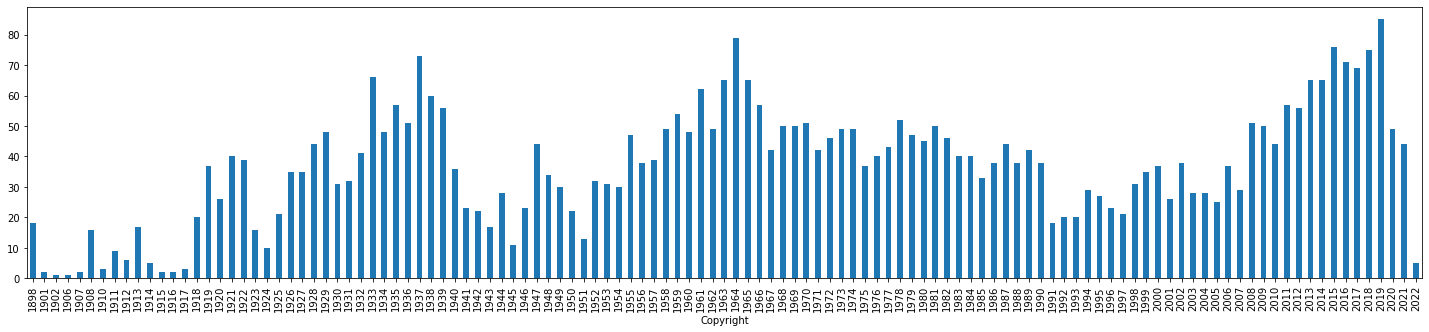

In [9]:
df.groupby("Copyright")["Film"].nunique().plot.bar(figsize=(25,5))

In [10]:
df[df["Copyright"] == 2018]["Film"].to_list()

['Spolu sami (401989)',
 'Pat & Mat zimní radovánky (401837)',
 'Člověk Kilimandžáro (401987)',
 'Karkulka a sedm trpaslíků (401935)',
 'Mimi & Líza (401839)',
 'Markéta chce taštičku (401915)',
 'Pasažéři (401825)',
 'Sněží! (401921)',
 'Central Bus Station (401856)',
 'Kapela (401855)',
 'Vítězové Anifilmu 2018 (401930)',
 'Woo-Hoo! (401933)',
 'Čertí brko (401838)',
 'Chůze a běhy (401934)',
 'Na Stojáka v kině (401847)',
 'Pod mrakem (401947)',
 'Po čem muži touží (401845)',
 'Dobrá smrt (401966)',
 'Ten, kdo tě miloval (401842)',
 'Zlatý podraz (401841)',
 'Když draka bolí hlava (401840)',
 'Iluze (401851)',
 'Odborný dohled nad výkladem snu (401766)',
 'Jak se moří revizoři (401822)',
 'Až přijde válka (401769)',
 'Miss Hanoi (401768)',
 '30 Amper (402051)',
 'Chata na prodej (401767)',
 'Žalman aneb Naslouchám tichu Země (401765)',
 'Kluci z hor (401764)',
 'Pat & Mat znovu v akci (401762)',
 'Pepa (401760)',
 'Teambuilding (401759)',
 'Tátova volha (401758)',
 'Na krátko (40175

<AxesSubplot:xlabel='Copyright'>

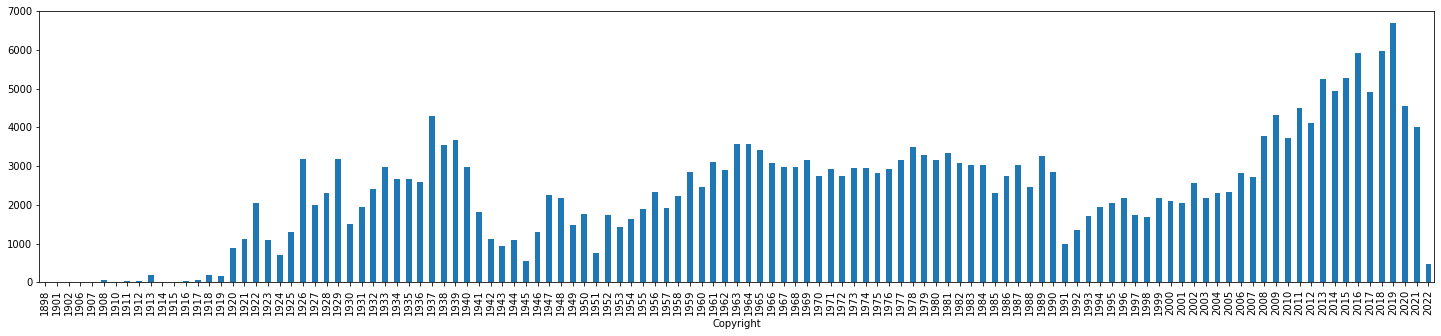

In [11]:
df.groupby("Copyright")["Minutáž"].sum().plot.bar(figsize=(25,5))

<AxesSubplot:xlabel='Copyright'>

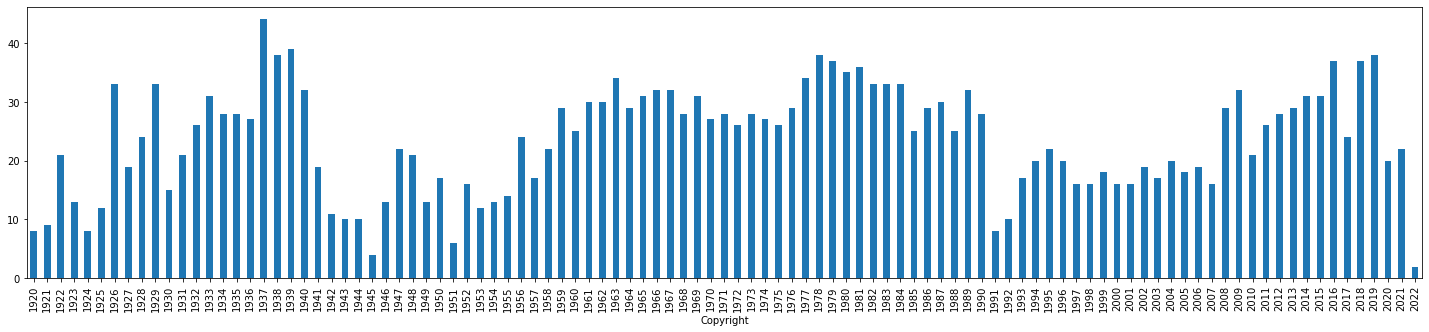

In [12]:
hcf.groupby("Copyright")["Film"].nunique().plot.bar(figsize=(25,5))

<AxesSubplot:xlabel='Copyright'>

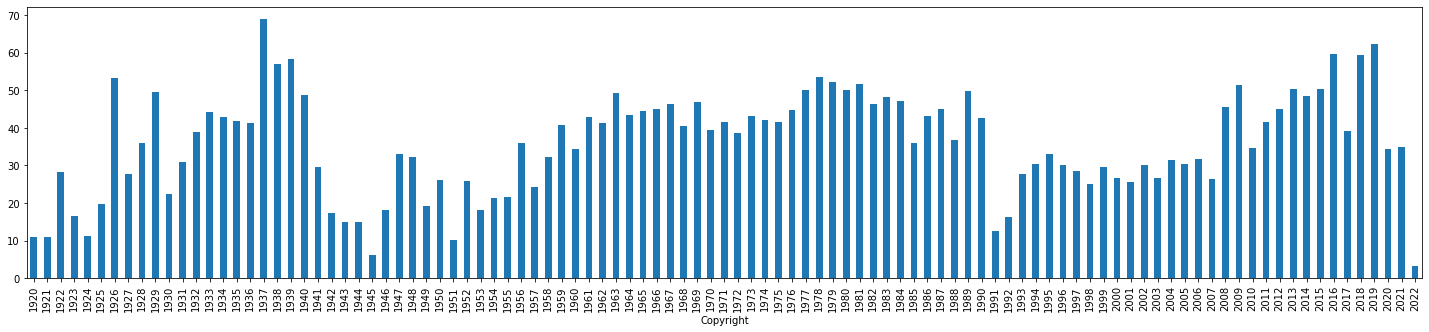

In [13]:
hcf.groupby("Copyright")["Minutáž"].sum().apply(lambda x: x/60).plot.bar(figsize=(25,5))

In [14]:
hcf.groupby("Copyright")["Film"].nunique().nlargest(5)

Copyright
1937    44
1939    39
1938    38
1978    38
2019    38
Name: Film, dtype: int64

In [15]:
hcf.groupby("Copyright")["Film"].nunique().nsmallest(5)

Copyright
2022    2
1945    4
1951    6
1920    8
1924    8
Name: Film, dtype: int64

<AxesSubplot:xlabel='Copyright'>

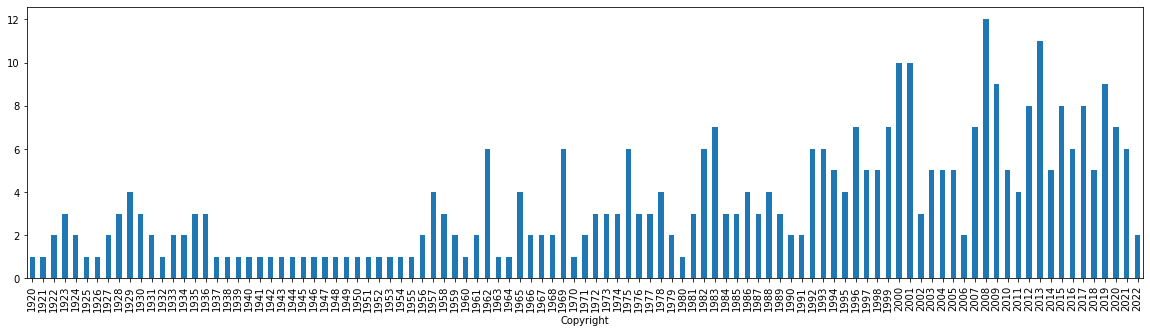

In [16]:
hcf.explode("Země původu").groupby("Copyright")["Země původu"].nunique().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

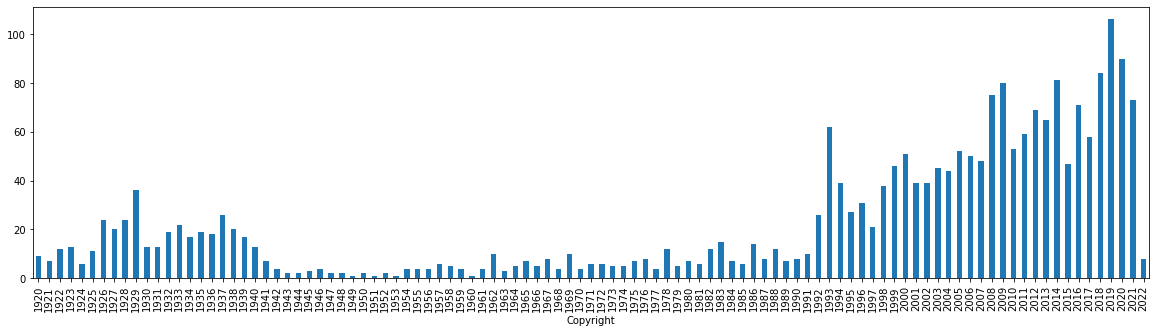

In [17]:
hcf.explode("Výrobce").groupby("Copyright")["Výrobce"].nunique().plot.bar(figsize=(20,5))

In [18]:
hcf[hcf["Copyright"] >= 1993].explode("Výrobce").groupby("Výrobce")["Film"].nunique().nlargest(15)

Výrobce
ČESKÁ TELEVIZE (92472)                         330
Filmové centrum (125132)                        88
innogy Česká republika a.s. (102179)            53
Rozhlas a televízia Slovenska (123177)          50
IN Film Praha spol. s r.o. (92591)              37
i/o post s.r.o. (101238)                        32
NEGATIV s.r.o. (92586)                          31
Universal Production Partners, a.s. (92762)     31
Barrandov Studio a.s. (92704)                   29
KRÁTKÝ FILM PRAHA a. s. [od 1991] (92610)       28
Slovenská televízia (94758)                     24
Soundsquare, a.s. (100417)                      24
CINEART TV Prague s.r.o. (92896)                23
HBO Europe s.r.o. (93721)                       23
TV Nova s.r.o. (94261)                          21
Name: Film, dtype: int64

## Nástup barvy

In [19]:
hcf["Barva"].drop_duplicates().to_list()

['černobílý',
 ['virážovaný', 'černobílý'],
 ['virážovaný', 'černobílý', 'tónovaný'],
 ['barevný', 'černobílý'],
 'barevný',
 ['virážovaný', 'barevný']]

In [20]:
hcfbarevny = hcf.explode("Barva")
hcfbarevny = hcfbarevny[hcfbarevny["Barva"] == "barevný"]

In [21]:
pomer_barevneho = pd.Series(hcfbarevny[hcfbarevny["Barva"] == "barevný"].groupby("Copyright")["Film"].nunique() / hcf.groupby("Copyright")["Film"].nunique())

<AxesSubplot:xlabel='Copyright'>

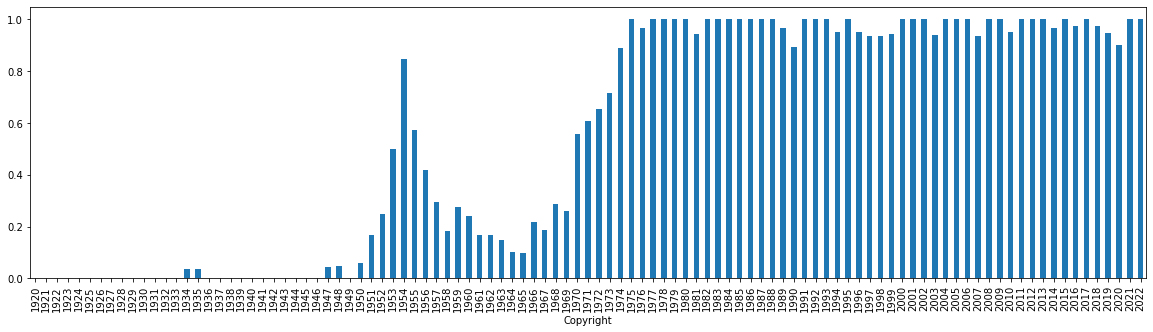

In [22]:
pomer_barevneho.plot.bar(figsize=(20,5))

In [23]:
pomer_barevneho[pomer_barevneho > 0].head(3)

Copyright
1934    0.035714
1935    0.035714
1947    0.045455
Name: Film, dtype: float64

In [24]:
pomer_barevneho[pomer_barevneho > 0.5]

Copyright
1954    0.846154
1955    0.571429
1970    0.555556
1971    0.607143
1972    0.653846
1973    0.714286
1974    0.888889
1975    1.000000
1976    0.965517
1977    1.000000
1978    1.000000
1979    1.000000
1980    1.000000
1981    0.944444
1982    1.000000
1983    1.000000
1984    1.000000
1985    1.000000
1986    1.000000
1987    1.000000
1988    1.000000
1989    0.968750
1990    0.892857
1991    1.000000
1992    1.000000
1993    1.000000
1994    0.950000
1995    1.000000
1996    0.950000
1997    0.937500
1998    0.937500
1999    0.944444
2000    1.000000
2001    1.000000
2002    1.000000
2003    0.941176
2004    1.000000
2005    1.000000
2006    1.000000
2007    0.937500
2008    1.000000
2009    1.000000
2010    0.952381
2011    1.000000
2012    1.000000
2013    1.000000
2014    0.967742
2015    1.000000
2016    0.972973
2017    1.000000
2018    0.972973
2019    0.947368
2020    0.900000
2021    1.000000
2022    1.000000
Name: Film, dtype: float64

In [25]:
pd.Series(hcfbarevny[hcfbarevny["Barva"] == "barevný"].groupby("Copyright")["Film"].nunique() / hcf.groupby("Copyright")["Film"].nunique()).nsmallest(15)

Copyright
1934    0.035714
1935    0.035714
1947    0.045455
1948    0.047619
1950    0.058824
1965    0.096774
1964    0.103448
1963    0.147059
1951    0.166667
1961    0.166667
1962    0.166667
1958    0.181818
1967    0.187500
1966    0.218750
1960    0.240000
Name: Film, dtype: float64

In [26]:
pd.options.display.max_colwidth = 1000

In [27]:
hcfbarevny[hcfbarevny["Barva"] == "barevný"].sort_values(by="Copyright")[["Copyright","Film","Premiéra","Poznámka","Žánr","Režie"]].head(15)

,Copyright,Film,Premiéra,Poznámka,Žánr,Režie
655,1934,Na růžích ustláno (395649),"premiéra 25. 1. 1935 /nepřístupný mládeži/ (kina Avion /2 týdny/, Juliš /2 týdny/ a Světozor /2 týdny/, Praha) obnovená premiéra 9. 10. 1942 /nepřístupný mládeži/ (kino Lido /1 týden/, Praha)",Závěr filmu byl natočenm barevně systémem Ing. Horsta a Kretchmera. V roce 1942 byl film uveden znovu do distribuce pod názvem Svatba v růžích.,"[hudební, komedie, opereta]",[Miroslav Cikán (31969)]
730,1935,Maryša (395704),"premiéra 29. 11. 1935 /nepřístupný mládeži/ (kina Fénix /2 týdny/ a Lucerna /2 týdny/, Praha) obnovená premiéra 13. 7. 1945 /přístupný mládeži/","Kroje zapůjčili obyvatelé Vlčnova, zejména pan F. Zemek, poštmistr v. v. Film byl uveden na IV. mezinárodním filmovém festivalu v Benátkách roku 1936. Národní filmový archiv archivuje dvoubarevnou část 3. dílu KK-N 95,7 m, DNO-Z, DNZ-A.",drama,[Josef Rovenský (37766)]
1183,1947,Jan Roháč z Dubé (396046),"předpremiéra 21. 3. 1947 (Dubá) premiéra 28. 3. 1947 /přístupný mládeži/ (kina Lucerna /4 týdny/, Moskva /3 týdny/ a Sevastopol /4 týdny/, Praha)",První český barevný hraný film (systém Agfacolor). Negativ byl ještě ve 40. letech zkrácen.,"[drama, historický, válečný]",[Vladimír Borský (37346)]
1224,1948,Pytlákova schovanka aneb Šlechetný milionář (396102),"premiéra 1. 4. 1949 /nepřístupný mládeži/ (kina Olympic /1 týden/, Oko /1 týden/ a Hvězda /8 týdnů od 22. 4./, Praha) obnovená premiéra 1. 2. 1983 /přístupný mládeži/",Závěr tohoto černobílého snímku je barevný.,"[melodrama, parodie]",[Martin Frič (20324)]
1288,1950,Temno (396119),"premiéra 24. 8. 1951 /přístupný mládeži/ (kina Alfa /4 týdny/ a Lucerna /2 týdny/, Praha)",None,"[drama, historický]",[Karel Steklý (35894)]
1305,1951,Císařův pekař – Pekařův císař (396131),"premiéra 28. 12. 1951 /přístupný mládeži/ (kina Lucerna /13 týdnů/, Moskva /3 týdny od 4. 1. 1952/, Blaník /5 týdnů 18. 1. 1952/, Aero /1 týden od 1. 2. 1952/, Oko /1 týden od 1. 2. 1952/, Revoluce /1 týden od 8. 2. 1952/, Dukla /1 týden od 15. 2. 1952/, Odboj /1 týden od 22. 2. 1952/ a Arbes /1 týden od 29. 2. 1952/, Praha /druhá část/) premiéra 28. 12. 1951 /přístupný mládeži/ (kina Blaník /8 týdnů/, Lucerna /13 týdnů/, Aero /1 týden od 25. 1. 1952/, Oko /1 týden od 1. 2. 1952/, Revoluce /1 týden od 8. 2. 1952/, Dukla /1 týden 15. 2. 1952/, Odboj /1 týden od 22. 2. 1952/ a Arbes /1 týden od 28. 2. 1952/, Praha /první část/)","Film původně roztočil režisér Jiří Krejčík. Po neshodách s Janem Werichem a po politickém zásahu byl odvolán a projekt převzal Martin Frič. S režisérem se částečně změnilo i herecké obsazení. Původně se ve filmu měli objevit Ljuba Hermanová (hraběnka Anna Marie Stradová), Irena Kačírková (Kateřina alias umělá žena Sirael), Karel Höger (magistr Edward Kelley) a Saša Rašilov (vrchní alchymista Jeroným Alessandro Scotta, vlastním jménem Jan Skoták). Hudbu měl složit Václav Trojan.\n\n\n\nCísařův pekař – Pekařův císař je dvoudílný film (původní metráž jednotlivých částí je 2 451 a 1 949 metrů). Na konci padesátých let byla uvedena do distribuce režisérem Martinem Fričem zkrácená verze (3 064,7 metrů).","[historický, komedie]",[Martin Frič (20324)]
1321,1952,Mladá léta (396152),"premiéra 27. 2. 1953 /přístupný mládeži/ (kina Alfa /4 týdny/, Blaník /3 týdny/, Kyjev /1 týden od 20. 3./ a Bystrica /1 týden od 27. 3./, Praha)",None,životopisný,[Václav Krška (20325)]
1329,1952,Zítra se bude tančit všude (396146),"premiéra 24. 10. 1952 /přístupný mládeži/ (kina Armádní /1 týden/, Blaník /3 týdny/, Lucerna /3 týdny/ a Kyjev /1 týden od 31. 10./, Praha)",None,hudební,[Vladimír Vlček (72986)]
1331,1952,Dovolená s Andělem (396144),"premiéra 3. 4. 1953 /přístupný mládeži/ (kina Alfa /5 týdnů/, Lucerna /4 týdny/, Blaník /1 týden od 10. 4./, Kyjev /1 týden od 24. 4./ a Bystrica /1 týden od 1. 5./, Praha)",None,komedie,[Bořivoj Zeman (8886)]
1346,1952,Nástup (396141),"premiéra 1. 5. 1953 /přístupný mládeži/ (kina Lucerna /4 týdny/, Sevastopol /1 týden/, Armádní /2 týdny 

In [28]:
hcf[hcf["Barva"] == "barevný"].sort_values(by="Copyright")[["Copyright","Film","Premiéra","Poznámka"]].head(10)

,Copyright,Film,Premiéra,Poznámka
1183,1947,Jan Roháč z Dubé (396046),"předpremiéra 21. 3. 1947 (Dubá) premiéra 28. 3. 1947 /přístupný mládeži/ (kina Lucerna /4 týdny/, Moskva /3 týdny/ a Sevastopol /4 týdny/, Praha)",První český barevný hraný film (systém Agfacolor). Negativ byl ještě ve 40. letech zkrácen.
1288,1950,Temno (396119),"premiéra 24. 8. 1951 /přístupný mládeži/ (kina Alfa /4 týdny/ a Lucerna /2 týdny/, Praha)",None
1305,1951,Císařův pekař – Pekařův císař (396131),"premiéra 28. 12. 1951 /přístupný mládeži/ (kina Lucerna /13 týdnů/, Moskva /3 týdny od 4. 1. 1952/, Blaník /5 týdnů 18. 1. 1952/, Aero /1 týden od 1. 2. 1952/, Oko /1 týden od 1. 2. 1952/, Revoluce /1 týden od 8. 2. 1952/, Dukla /1 týden od 15. 2. 1952/, Odboj /1 týden od 22. 2. 1952/ a Arbes /1 týden od 29. 2. 1952/, Praha /druhá část/) premiéra 28. 12. 1951 /přístupný mládeži/ (kina Blaník /8 týdnů/, Lucerna /13 týdnů/, Aero /1 týden od 25. 1. 1952/, Oko /1 týden od 1. 2. 1952/, Revoluce /1 týden od 8. 2. 1952/, Dukla /1 týden 15. 2. 1952/, Odboj /1 týden od 22. 2. 1952/ a Arbes /1 týden od 28. 2. 1952/, Praha /první část/)","Film původně roztočil režisér Jiří Krejčík. Po neshodách s Janem Werichem a po politickém zásahu byl odvolán a projekt převzal Martin Frič. S režisérem se částečně změnilo i herecké obsazení. Původně se ve filmu měli objevit Ljuba Hermanová (hraběnka Anna Marie Stradová), Irena Kačírková (Kateřina alias umělá žena Sirael), Karel Höger (magistr Edward Kelley) a Saša Rašilov (vrchní alchymista Jeroným Alessandro Scotta, vlastním jménem Jan Skoták). Hudbu měl složit Václav Trojan.\n\n\n\nCísařův pekař – Pekařův císař je dvoudílný film (původní metráž jednotlivých částí je 2 451 a 1 949 metrů). Na konci padesátých let byla uvedena do distribuce režisérem Martinem Fričem zkrácená verze (3 064,7 metrů)."
1321,1952,Mladá léta (396152),"premiéra 27. 2. 1953 /přístupný mládeži/ (kina Alfa /4 týdny/, Blaník /3 týdny/, Kyjev /1 týden od 20. 3./ a Bystrica /1 týden od 27. 3./, Praha)",None
1329,1952,Zítra se bude tančit všude (396146),"premiéra 24. 10. 1952 /přístupný mládeži/ (kina Armádní /1 týden/, Blaník /3 týdny/, Lucerna /3 týdny/ a Kyjev /1 týden od 31. 10./, Praha)",None
1331,1952,Dovolená s Andělem (396144),"premiéra 3. 4. 1953 /přístupný mládeži/ (kina Alfa /5 týdnů/, Lucerna /4 týdny/, Blaník /1 týden od 10. 4./, Kyjev /1 týden od 24. 4./ a Bystrica /1 týden od 1. 5./, Praha)",None
1346,1952,Nástup (396141),"premiéra 1. 5. 1953 /přístupný mládeži/ (kina Lucerna /4 týdny/, Sevastopol /1 týden/, Armádní /2 týdny od 8. 5./, Kyjev /1 týden od 8. 5./, Oko /1 týden od 15. 5./, Bystrica /1 týden od 22. 5./, Dukla /1 týden od 22. 5./, Odboj /1 týden od 29. 5./, Arbes /1 týden od 5. 6./, Revoluce /1 týden od 5. 6./ a Aero /1 týden od 12. 6./, Praha)",None
1378,1953,Výstraha (396164),"premiéra 4. 6. 1954 /přístupný mládeži/ (kina Jalta /2 týdny/ a Kyjev /1 týden/, Praha)",None
1375,1953,Tajemství krve (396162),"premiéra 25. 12. 1953 /přístupný mládeži/ (kina Lucerna /4 týdny/, Sevastopol /4 týdny/, Armádní /3 týdny/, Bystrica /1 týden od 15. 1. 1954/, Kyjev /1 týden od 15. 1. 1954/, Arbes /1 týden od 22. 1. 1954/, Moskva /1 týden od 22. 1. 1954/, Dukla /1 týden od 29. 1. 1954/, Odboj /1 týden od 29. 1. 1954/, Oko /1 týden od 5. 2. 1954/, Revoluce /1 týden od 5. 2. 1954/ a Aero /1 týden od 12. 2. 1954/, Praha)",None
1371,1953,Můj přítel Fabián (396166),"premiéra 7. 1. 1955 /přístupný mládeži/ (kina Pasáž /5 týdnů/, Revoluce /1 týden/, Kyjev /1 týden od 14. 1./, Oko /1 týden od 28. 1./ a Vzlet /1 týden od 4. 2./, Praha)",None


## Širokoúhlé formáty

In [29]:
df["Poměr stran"].drop_duplicates().to_list()

[[1.33, 1.26],
 1.26,
 1.33,
 [1.33, 1.19],
 1.19,
 [1.37, 1.33],
 1.37,
 [1.37, 1.19],
 [1.85, 1.37],
 [1.6600000000000001, 2.35],
 [1.37, 2.35],
 [1.6600000000000001, 1.85],
 2.35,
 [1.85, 2.35],
 1.6600000000000001,
 1.85,
 [1.6600000000000001, 2.35, 2.55],
 [1.6600000000000001, 1.37],
 None,
 [1.37, 1.78],
 1.78,
 [1.6600000000000001, 1.37, 2.35],
 [1.85, 1.37, 1.19],
 [1.85, 1.78],
 [1.78, 1.33],
 2.39,
 [2.35, 1.78],
 2.55]

In [30]:
pomerstran = hcf.explode("Poměr stran")

<AxesSubplot:xlabel='Copyright'>

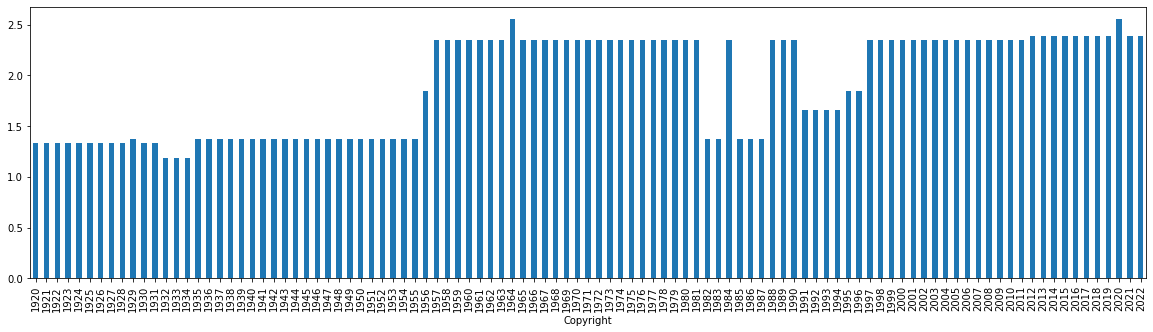

In [31]:
pomerstran.groupby("Copyright")["Poměr stran"].max().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

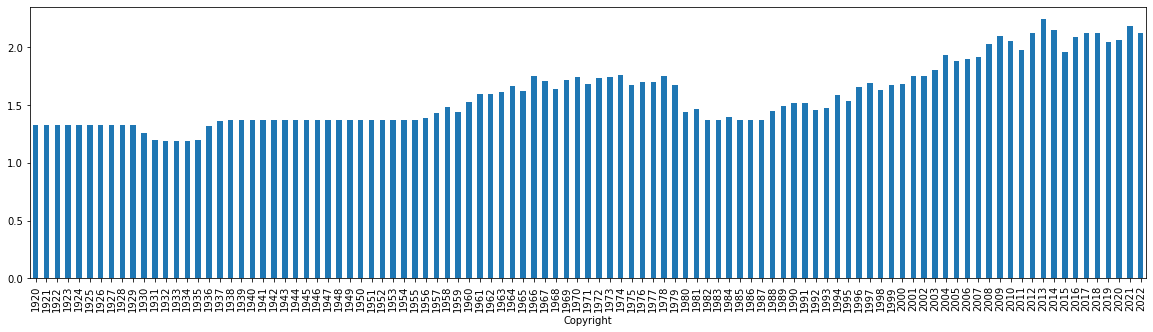

In [32]:
pomer = pd.DataFrame(pomerstran.groupby(["Film","Copyright"])["Poměr stran"].max())
pomer.groupby("Copyright")["Poměr stran"].mean().plot.bar(figsize=(20,5))

## Nástup zvuku

<AxesSubplot:xlabel='Copyright'>

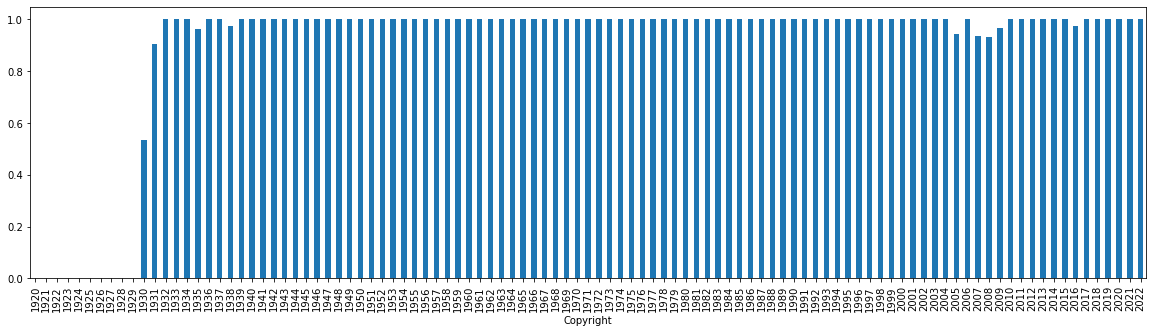

In [33]:
pd.Series(hcf[hcf["Zvukový"] == "zvukový"].groupby("Copyright")["Film"].nunique() / hcf.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

In [34]:
hcf[hcf["Zvukový"] == "zvukový"].sort_values(by="Copyright")[["Copyright","Film","Premiéra","Poznámka","Žánr"]].head(10)

,Copyright,Film,Premiéra,Poznámka,Žánr
459,1930,Tonka Šibenice (395520),"premiéra 27. 2. 1930 /nepřístupný mládeži/ (kino Alfa /6 týdnů/, Praha)","Film byl natočen jako němý, po požáru Kavalírky v roce 1929 byl ozvučen ve Francii v ateliérech Gaumont, Joinville u Paříže. Zároveň byly pořízeny verze v německém (Der Galgentoni) a francouzském (Tonischka) jazyce. V české jazykové mutaci byl na začátek filmu zařazen prolog, kde Karel Hašler za klavírního doprovodu Erno Košťála zazpíval své dvě písně Hradčany krásné a Když v Praze padá sníh. V další části prologu mluvil herec Theodor Pištěk o prostředí, v němž se odehrává děj filmu. V Národním filmovém archivu existuje pouze francouzská verze s distribučním názvem Tonischka, z české verze se dochovalo pouze 15,0 m prologu, v němž Karel Hašler zpívá píseň Hradčany krásné.",drama
465,1930,Za rodnou hroudu (395518),"premiéra 24. 10. 1930 /nepřístupný mládeži/ (kino Avion /3 týdny/, Praha)","Ve filmu jsou použity četné dokumentární záběry I. světové války. Film je němý a podložený hudbou. Jediná zvuková scéna je v lazaretu, kde Josef Rovenský zpívá píseň Kde domov můj.",drama
469,1930,Tajemství lékařovo (395513),"premiéra 2. 1. 1931 /nepřístupný mládeži/ (kino Metro /2 týdny/, Praha)","První ze tří filmů amerického Paramountu, natočených v různých jazykových verzích ve stejných dekoracích v pařížských ateliérech: The Doctor's Secret – americká verze, režie William G. DeMille, El secreto del doctor – španělská verze, režie Charles de Rochefort, Il segreto del dottore – italská verze, režie John W. Brunius, Tajemnica lekarza – polská verze, režie Ryszard Ordyński. Filmové materiály jsou pokládány za ztracené.",drama
474,1930,Lidé v bouři (395507),"zahraniční premiéra 16. 12. 1930 (Berlín, Německo) premiéra 13. 2. 1931 /nepřístupný mládeži/ (kina Avion /2 týdny/ a Kapitol /1 týden/, Praha)",Film byl natočen pouze v německé verzi. Ve filmu jsou použity vzácné snímky z noční hamburské zábavní čtvrti.,drama
476,1930,Když struny lkají (395505),"premiéra 19. 9. 1930 /nepřístupný mládeži/ (kino Alfa /5 týdnů/, Praha)",První český dlouhý hraný zvukový film měl být natočen původně podle námětu Quido E. Kujala Slovanské melodie firmou Beda Heller. Pro finanční náročnost projekt převzal Osvald Kosek se společností AB.\n\nNovou kopii sestavil roku 1954 Miroslav J. Krňanský s Janem Čermákem z dochované části negativu. Chybějící scény byly nahrazeny vysvětlujícími mezititulky.,melodrama
477,1930,Fidlovačka (395504),"premiéra 25. 12. 1930 /přístupný mládeži/ (kina Adria /6 týdnů/ a Lucerna /6 týdnů/, Praha)",V dobovém tisku byla Fidlovačka označována za „první ryze český zvukový a mluvící film“.,"[hudební, komedie]"
479,1930,Černý plamen (395502),"premiéra 15. 5. 1931 /nepřístupný mládeži/ (kino Fénix /1 týden/, Praha)","Film byl natočen v roce 1929 jako němý s prologem, ve kterém hráli Bronislava Livia a Zvonimir Rogoz (do zvukové verze nebyl prolog zařazen). Film byl vydán 1931 s dodatečně mluvenými scénami a synchronizován hudbou. Zvuková verze je uvedena nafilmovaným proslovem F. X. Svobody.",melodrama
482,1930,C. a k. polní maršálek (395499),"slavnostní premiéra 23. 10. 1930 (kino Fénix, Praha) premiéra 24. 10. 1930 /nepřístupný mládeži/ (kina Adria /9 týdnů/ a Fénix /13 týdnů/, Praha)",None,komedie
514,1931,Kariéra Pavla Čamrdy (395542),"premiéra 25. 12. 1931 /přístupný mládeži/ (kina Hvězda /3 týdny/ a Metro /3 týdny/, Praha)",None,komedie
515,1931,Karel Havlíček Borovský (395548),"premiéra 25. 9. 1931 /přístupný mládeži/ (kina Adria /2 týdny/, Hvězda /3 týdny/ a Světozor /2 týdny/, Praha)","Tento námět byl již v českém filmu zpracován pod stejným názvem (r. Karel Lamač a Theodor Pištěk, 1925).",životopisný


In [35]:
hcf[hcf["Zvukový"] != "zvukový"].sort_values(by="Copyright")[["Copyright","Film","Premiéra","Poznámka","Žánr","Zvukový","Anotace","Obsah"]].tail(10)

,Copyright,Film,Premiéra,Poznámka,Žánr,Zvukový,Anotace,Obsah
494,1931,Vesničtí soupeři (395532),premiéra 02/1931 /přístupný mládeži/,"Film byl natočen jako němý. Byl vyroben pro nákupní a prodejní společnost chemického velkoprůmyslu Fosfacid, která jej zdarma půjčovala kinům.",osvětový,němý,None,"O práci dvou hospodářů, z nichž jeden pracuje postaru, druhý moderními metodami. Používá umělá hnojiva superfosfátu a granozotu."
518,1931,Muži v offsidu (395545),"premiéra 11. 9. 1931 /nepřístupný mládeži/ (kina Kotva /6 týdnů/ a Lucerna /6 týdnů/, Praha) obnovená premiéra 04/1932 /nepřístupný mládeži/ (němá verze) obnovená premiéra 27. 9. 1946 /přístupný mládeži/ obnovená premiéra 7. 3. 1969 /přístupný mládeži/","Ve filmu jsou použity vzácné snímky ze starého hřiště A. C. Sparty, pohyblivého chodníku na Letnou a ze zábavního parku ve vršovickém Edenu. Volné pokračování viz Načeradec, král kibiců (1932).",komedie,"němý, zvukový","Humoristický román Karla Poláčka se od svého vydání těšil živému čtenářskému zájmu. Nápad přenést příběh o vášnivých fotbalových fanoušcích na filmové plátno se realizoval roce 1931 pod režijním vedením osvědčeného Svatopluka Innemanna. Úspěšný režisér němých snímků teprve zkoumal technické ošidnosti zvukového filmu, přesto však vznikla nestárnoucí komedie, která vdechla filmový život poláčkovským hrdinům i spisovatelovu humoru. V roli žižkovského obchodníka Načeradce, který oddanost „svému“ fotbalovému klubu S. K. Slavie staví vysoko nad své rodinné i pracovní povinnosti, exceluje Hugo Haas. Part Krejčího Habáska, který s dospělým synem Emanem fandí mužstvu S. K. Viktorie, připadl Jindřichu Plachtovi. O rok později natočil Gustav Machatý podle Poláčkovy předlohy komedii Načeradec, král kibiců, opět s Haasem.","Majitel obchodu s konfekcí, pan Richard Načeradec ze Žižkova, je nadšeným fandou S. K. Slavie a přes odpor své ženy chodí každou neděli na fotbal. Krejčí Emanuel Habásko žije osaměle s dospělým synem Emanem. Krejčího nekonečně uhání vdova Ouholičková, ale otec Habásko statečně odolává. Habáskové neuznávají jiný klub kromě S. K. Viktorie. Jednou na utkání Slavie - Viktorie se střetne Načeradec s Emanem. Jejich bouřlivou rozpravu ukončí až strážník a odsoudí oba k pořádkové pokutě. Eman, který je nezaměstnaný, nemá na pokutu peníze. Načeradec zaplatí i za něho a nabídne mu práci ve svém obchodě. V novém zaměstnání se Eman zamiluje do Emilky Šefelínové z Nuslí. Tuto známost chce otec Šefelín bez milosti ukončit. Ale oblíbí si otce Habáska pro jeho bodrou povahu. Proto může všechno skončit svatbou Emana s Emilkou v kostele svaté Ludmily."
745,1935,Koho jsem včera líbal? (395678),premiéra 04/1935 /nepřístupný mládeži/,"Film původně režíroval Zvonimir Rogoz, týden před koncem natáčení z projektu odstoupil a snímek dokončil Jan Svoboda. Dochovala se neúplná podoba filmu.",komedie,"němý, zvukový",None,"Mladý synovec generálního ředitele porcelánky Jan Konvalinka zastupuje svého strýce, ale místo práce se věnuje ženám. Krásná neznámá žena, které není Konvalinkovo dvoření vhod, požádá solidně vyhlížejícího pána, aby se vydával za jejího manžela a odehnal tak dotěrného nápadníka. Zachráncem je malý úředník Popelka, který v Janovi pozná svého nadřízeného. Díky kráse své „manželky“ je Popelka povýšen. Skutečná paní Popelková, semetrika zcela ovládající svého manžela, se vrací z pohřbu příbuzného. S ní příjíždí dcera zemřelého, Eva, jejíž sňatek je podmínkou k rozdělení dědictví. Jan mezitím zjistí, že krásná neznámá je ženou jiného zaměstnance továrny a chce Popelku za „podvod“ propustit. V jeho bytě však potkává Evu, a tentokrát považuje za paní Popelkovou ji. Eva ho v omylu ponechá a přijímá jeho dvoření. Díky záměně dostává pravá paní Popelková od Jana krásnou kytici s láskyplným vzkazem. Věrna své povaze si na mladého muže „došlápne“ a Popelka je propuštěn. Eva však najde cestu, j..."
926,1938,Neporažená armáda (395818),"premiéra 28. 10. 1938 /přístupný mládeži/ (kina Lucerna /2 týdny/ a Pasáž /2 týdny/, Praha

In [36]:
pd.options.display.max_colwidth = 100

In [37]:
neme_filmy = hcf[(hcf["Mluveno"].str.contains("bez dial",na=False))]["Film"].to_list()

<AxesSubplot:xlabel='Copyright'>

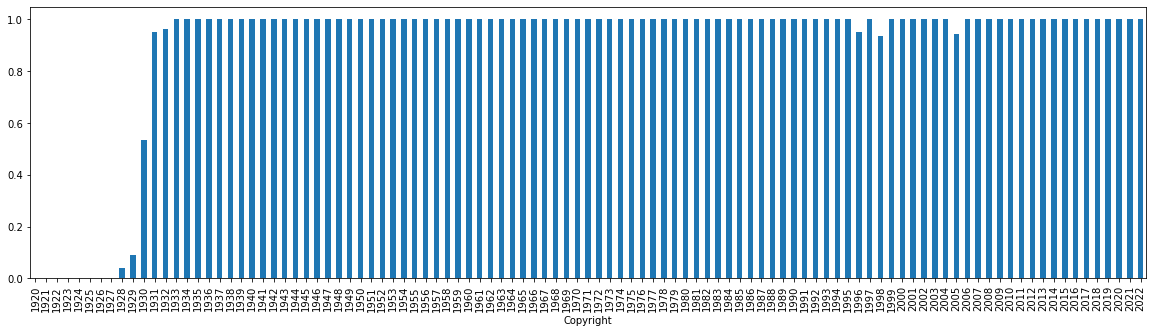

In [38]:
pd.Series(hcf[~hcf["Film"].isin(neme_filmy)].groupby("Copyright")["Film"].nunique() / hcf.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

## Nedochované filmy

In [39]:
df["Stav filmu"].drop_duplicates()

0                          None
4                   nedochovaný
47     nedokončený, nedochovaný
169                 nedokončený
Name: Stav filmu, dtype: object

<AxesSubplot:xlabel='Copyright'>

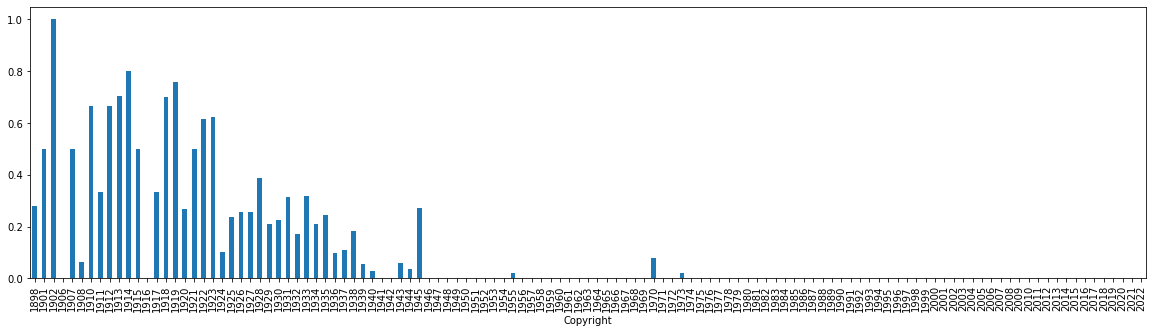

In [40]:
(df[df["Stav filmu"].str.lower().str.contains("nedocho",na=False)].groupby("Copyright")["Film"].nunique() / df.groupby("Copyright")["Film"].nunique()).plot.bar(figsize=(20,5))

In [41]:
nejobsazovanejsi_herci = df.explode("Hrají").groupby("Hrají")["Film"].nunique().nlargest(50).to_list()

In [42]:
nedochovane = df[df["Stav filmu"].str.lower().str.contains("nedocho",na=False)].explode("Hrají")

In [43]:
nedochovane.groupby("Hrají")["Film"].nunique().nlargest(10)

Hrají
Theodor Pištěk (37366)             33
Jan W. Speerger (55928)            27
Josef Šváb-Malostranský (55291)    22
Karel Lamač (37847)                21
Suzanne Marwille (127373)          17
Karel Schleichert (83230)          15
Alois Sedláček (126991)            13
Josef Rovenský (37766)             13
Luigi Hofman (125431)              13
Saša Dobrovolná (127820)           13
Name: Film, dtype: int64

In [44]:
nedochovane[nedochovane["Hrají"] == "Vlasta Burian (11992)"]

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby
255,Tu ten kámen (395326),Československo,1923,1923,"premiéra 7. 9. 1923 /nepřístupný mládeži/ (kina Hvězda a Minuta, Praha)",64.0,[Karel Anton (37987)],film,komedie,"[hraný, distribuční]",Tu ten kámen,Tu ten kámen,Tutankhamen,Kterak láskou možno v mžiku vzplanout třeba k nebožtíku,None,Vlasta Burian (11992),"[Fridolín, egyptolog Rapapides Bulva, starosta v Zelené Lhotě, sýrař, darmošlap/nepravý egyptolo...",None,None,[Karel Anton (37987)],[Karel Anton (37987)],None,[Otto Heller (127281)],None,"[Bohuslav Šula (127389), František Poneš (127988)]",None,None,None,None,None,None,None,None,None,None,[],"Nejrozpustilejší česká veselohra. V hlavních úlohách: Anny Ondráková, Vlasta Burian, Ferenc Futu...",[Anton (127987)],None,[Národní filmový archiv (92324)],[Julius Schmitt (127299)],dlouhometrážní,35mm,1.33,černobílý,němý,None,česká,bez dialogů,bez titulků,české,None,Hrdinou příběhu je mladý sličný asistent slavného egyptologa. Miluje jeho dceru Aenny a jeho lás...,None,None,None,None,None,None,None,None,None,1800.0,české,None,První filmová role Vlasty Buriana. Filmové materiály jsou pokládány za ztracené.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[Jaroslav Balzar (124087), Jaroslav Balzar]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,AB Vinohrady,None,None,None,None,None,None,None,None,None,nedochovaný,"How Love Can Flame in an Instant, Even for the Dead",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1923,1923


In [45]:
nedochovane.groupby("Film")["Copyright"].max().nlargest(10)

Film
Pytagorejci (396963)             1973
A v tom zámku... (400451)        1970
Anně K. je zima (400452)         1970
Hippokratova přísaha (400450)    1970
Návštěvy (400449)                1970
Vzorný fízl (401944)             1955
Jenom krok (396005)              1945
Pošťácká pohádka (398617)        1945
Z růže kvítek (396004)           1945
Předtucha (395984)               1944
Name: Copyright, dtype: int64

In [46]:
nedochovane[nedochovane["Délka"] == "dlouhometrážní"].groupby("Film")["Copyright"].max().nlargest(10)

Film
Jenom krok (396005)                 1945
Z růže kvítek (396004)              1945
Předtucha (395984)                  1944
Královna stříbrných hor (395855)    1939
Cikánská láska (395810)             1938
Pan otec Karafiát (395673)          1935
Polibek ve sněhu (395672)           1935
Vězeň na Bezdězi (395556)           1932
Aféra plukovníka Redla (395528)     1931
Svět bez hranic (395527)            1931
Name: Copyright, dtype: int64

## Obsahy

In [47]:
hcf["Délka obsahu"] = hcf["Obsah"].apply(lambda x: len(x) if x else 0)

<AxesSubplot:xlabel='Copyright'>

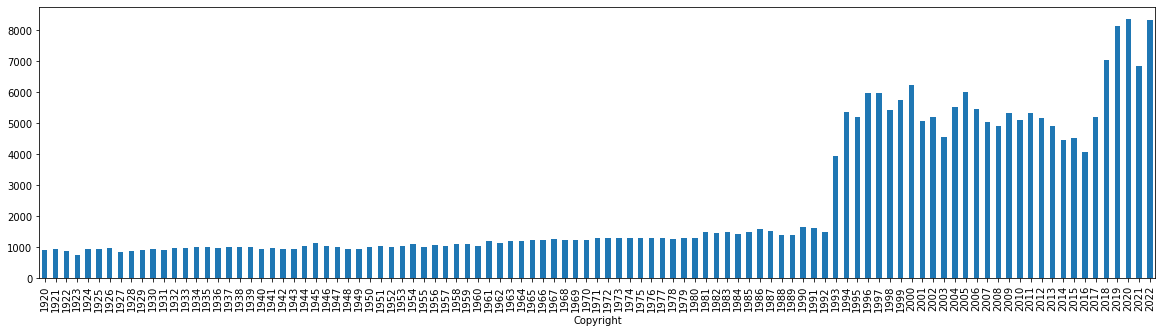

In [48]:
hcf.groupby("Copyright")["Délka obsahu"].median().plot.bar(figsize=(20,5))

Metodologický problém: porevoluční obsahy jsou delští, tzn. detailnější. Pomůžeme si prosekáním: necháme začátek, prostředek a konec.

In [49]:
hcf[hcf["Copyright"] <= 1992]["Délka obsahu"].mean()

1240.1590005678593

In [50]:
def zkrat_obsah(obsah):
    if not obsah:
        pass
    elif len(obsah) < 1000:
        pass
    else:
        zacatek = obsah[0:333]
        konec = obsah[-333:]
        prostredek = len(obsah)
        prostredek = obsah[prostredek-166:prostredek+166]
        obsah = f"{zacatek} {prostredek} {konec}"
    return(obsah)

In [51]:
hcf["Obsah1k"] = hcf["Obsah"].apply(lambda x: zkrat_obsah(x))

In [52]:
hcf["Obsah1k délka"] = hcf["Obsah1k"].apply(lambda x: len(x) if x else 0)

<AxesSubplot:xlabel='Copyright'>

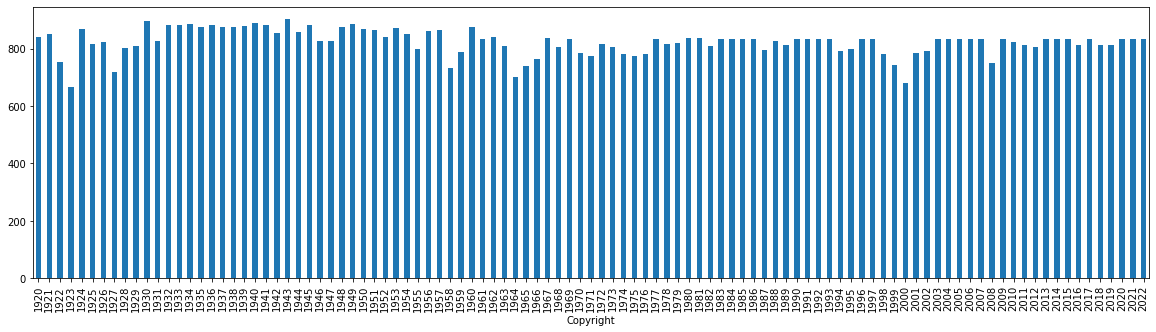

In [53]:
hcf.groupby("Copyright")["Obsah1k délka"].mean().plot.bar(figsize=(20,5))

<AxesSubplot:xlabel='Copyright'>

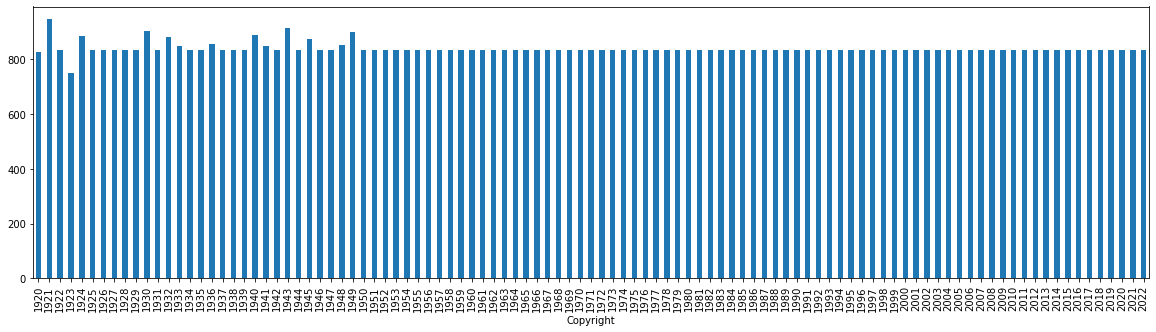

In [54]:
hcf.groupby("Copyright")["Obsah1k délka"].median().plot.bar(figsize=(20,5))

In [55]:
def jak_casto (slovo):
    df_pracovni = hcf[["Copyright","Film","Obsah1k","Minutáž"]]
    cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()
    cetnost.plot.bar(figsize=(20,5))
    return(cetnost)

Nejdřív zkusíme "když" – zjistíme tak, jestli někde něco nechybí.

Copyright
1920    0.125000
1921    0.666667
1922    0.428571
1923    0.307692
1924    0.375000
          ...   
2018    0.189189
2019    0.394737
2020    0.100000
2021    0.227273
2022         NaN
Name: Film, Length: 103, dtype: float64

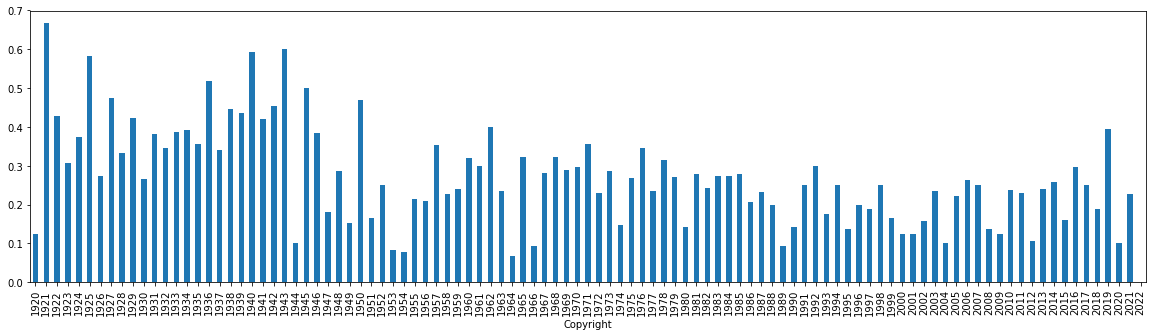

In [56]:
jak_casto("když")

Hurá, nechybí!

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920    0.125000
1921    0.222222
1922    0.095238
1923    0.307692
1924    0.250000
          ...   
2018    0.027027
2019    0.052632
2020    0.100000
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

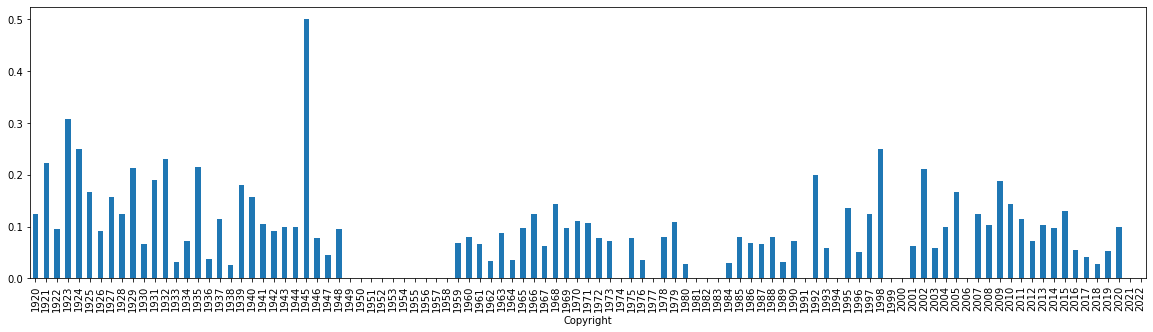

In [57]:
jak_casto("(milenk|milence|milenec|poměr[^\w]|nemanželsk)")

Copyright
1920         NaN
1921         NaN
1922         NaN
1923    0.076923
1924         NaN
          ...   
2018         NaN
2019    0.026316
2020         NaN
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

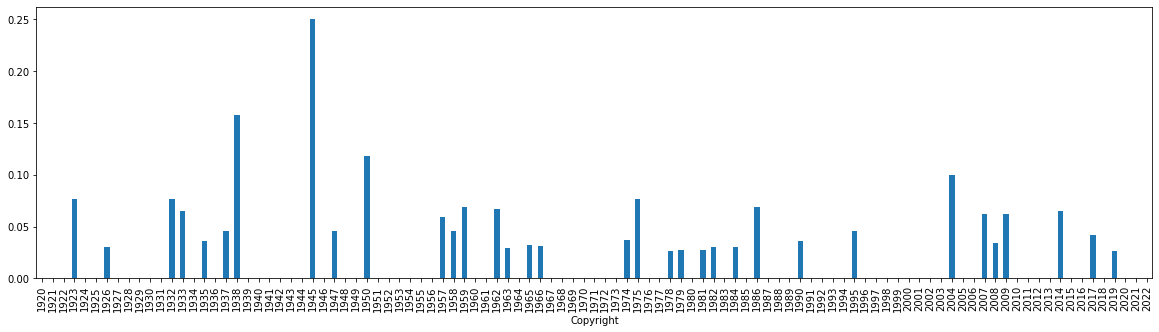

In [179]:
jak_casto("sport")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

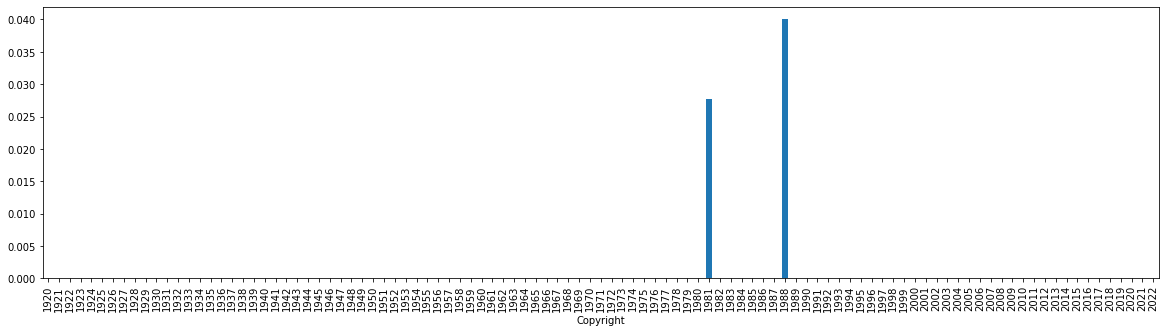

In [170]:
jak_casto(" hub(nou|nut|la)| zhub(nou|nut|la) | nadváh| obezi| obézn")

Copyright
1920     NaN
1921     NaN
1922     NaN
1923     NaN
1924     NaN
        ... 
2018     NaN
2019     NaN
2020    0.05
2021     NaN
2022     NaN
Name: Film, Length: 103, dtype: float64

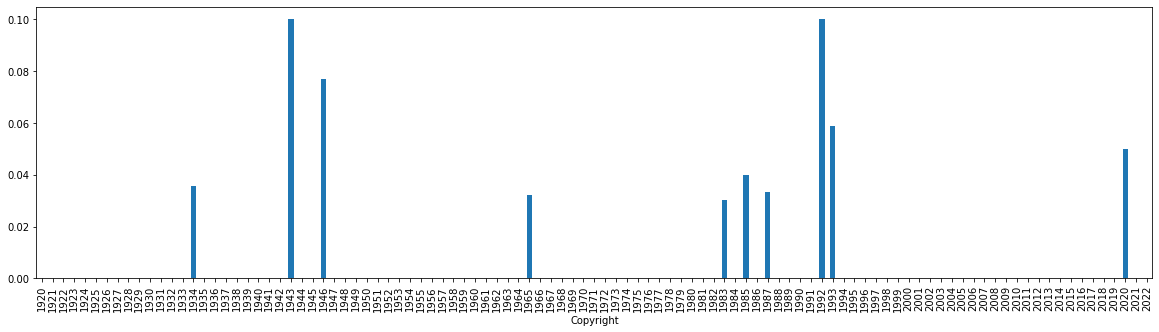

In [158]:
jak_casto(" invest[oi]")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920    0.125000
1921    0.111111
1922    0.142857
1923         NaN
1924    0.375000
          ...   
2018         NaN
2019         NaN
2020    0.050000
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

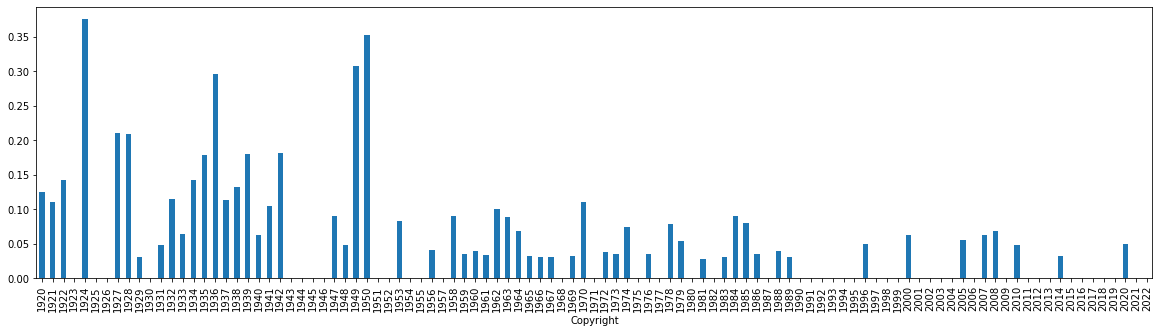

In [68]:
jak_casto("(továrn|fabrik)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920         NaN
1921    0.111111
1922         NaN
1923         NaN
1924         NaN
          ...   
2018    0.027027
2019    0.078947
2020    0.050000
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

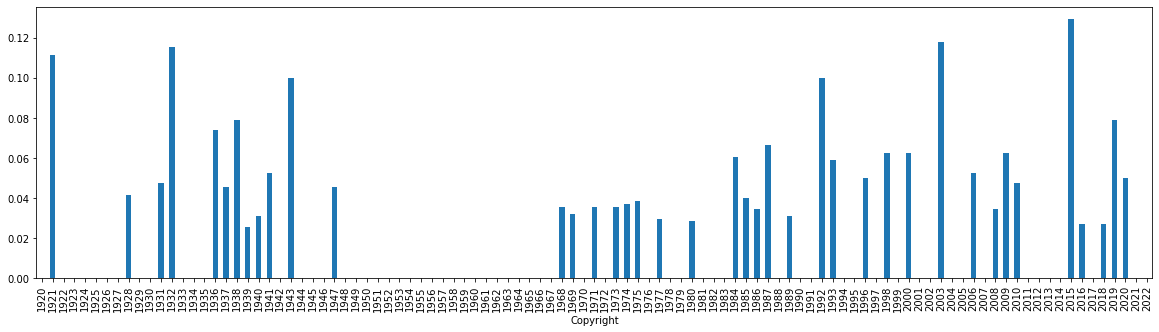

In [69]:
jak_casto("(kancelář)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

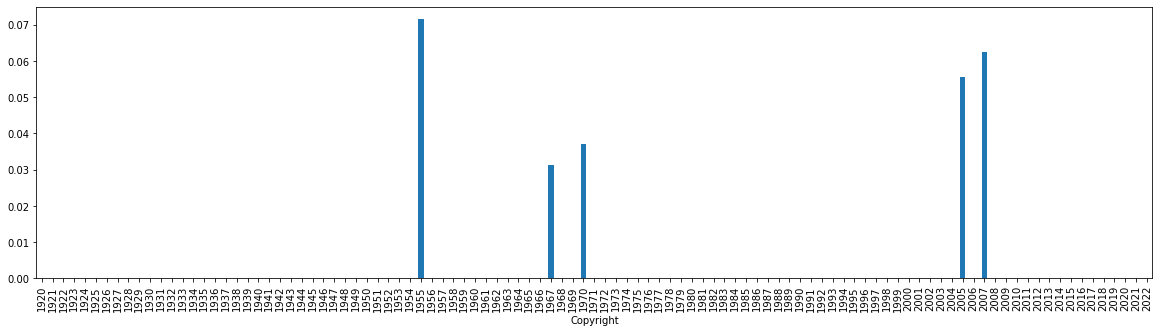

In [74]:
jak_casto("( pann[aeo])")

In [130]:
hcf[hcf["Obsah"].str.lower().str.contains("(drog[ay]|pervit|heroi|marihu| fet|narkom|kokain)",na=False)].sort_values(by="Copyright")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\2991388776.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  hcf[hcf["Obsah"].str.lower().str.contains("(drog[ay]|pervit|heroi|marihu| fet|narkom|kokain)",na=False)].sort_values(by="Copyright")


,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Délka obsahu,Obsah1k,Obsah1k délka
2016,Smrt za oponou (396688),Československo,1966,1966,premiéra 17. 3. 1967 /přístupný mládeži/ (celostátní) ...,85.0,[Antonín Kachlík (7880)],film,kriminální,hraný,Smrt za oponou,Smrt za oponou,Death behind the Curtain,None,Anděl hraje na violu,"[Miroslav Horníček (13266), Jaroslav Satoranský (2992), Jiří Mikota (17562), Květa Fialová (5338...","[kapitán Chrástek, poručík Mareček, nadporučík Antoš, tanečnice Milada Havlová, tanečnice Jana P...",[Miroslav Kubišta (77420)],[Jaroslav Toms (126648)],None,"[Antonín Kachlík (7880), Vladimír Bor (7824)]",[Věra Kalábová (4740)],[Jan Němeček (21841)],[Pavel Nečesal (21427)],[Milan Nejedlý (55074)],[Jan Kropáček (5320)],"[Anežka Kunová (18272), Marie Džbánková (18267), Jiří Budín (4404)]",[Jaromír Janáček (9496)],[Ladislav Hausdorf (126075)],None,[Jiří Bečka (2658)],"[Olga Mimrová (27841), Martin Günther Britting, Josef Hudlička]",None,[5047],[],[],Český kriminální film o mezinárodním pašeráckém gangu.,[Filmové studio Barrandov (96664)],None,[Státní fond kinematografie (124966)],[Ústřední půjčovna filmů (106116)],dlouhometrážní,"[16mm, 35mm]",1.37,černobílý,zvukový,mono,česká,"[česky, německy, francouzsky]",české,české,"V roce 1966 projevil režisér Antonín Kachlík zájem o žánr detektivky, který v té době na plátnec...",Členové organizace pašeráků heroinu posílají novou cestou zásilku drogy z Francie do Itálie přes...,[Antonín Kachlík (7880)],None,None,None,None,None,None,None,None,2412.0,None,None,None,[Alena Kreuzmannová (4743)],None,None,"[126215, Pavel Hejcman (Anděl hraje na violu – kniha)]",None,None,None,None,None,None,None,"[15006, 4995]",None,None,"[František Zajíček (127930), Oldřich Halaza, Ludmila Sovová]","[Pavla Marková (36607), Miloslav Mirvald (21426), Pavla Marková, Miloslav Mirvald (21426)]",None,None,[Karel Hejsek (18313)],None,None,None,None,[Divocí koně],"[Karel Mareš (2820), Jan Schneider (22465), Waldemar Matuška (1787)]",schválení literárního scénáře 30. 3. 1966 ...,None,None,None,None,None,None,Hostivař,None,None,[],None,None,None,None,None,None,None,None,[Jiří Hlupý (7013)],None,None,[Jaroslava Pražská],[Lilian Havlíčková (66986)],"[Marie Jindrová (87401), Ludmila Kaválková (126346), Libuše Černá (87460)]",[Eva Lichtensteinová (75654)],N

In [152]:
hcf[hcf["Obsah"].str.lower().str.contains("( homosex| gay| lesb)", na=False)].sort_values(by="Copyright")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\4127106859.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  hcf[hcf["Obsah"].str.lower().str.contains("( homosex| gay| lesb)", na=False)].sort_values(by="Copyright")


,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Délka obsahu,Obsah1k,Obsah1k délka
2050,Hotel pro cizince (396704),Československo,1966,1966,"premiéra 17. 3. 1967 /nepřístupný mládeži/ (kino Paříž /2 týdny/, Praha) ...",102.0,[Antonín Máša (5321)],film,tragikomedie,hraný,Hotel pro cizince,Hotel pro cizince,Hotel for Strangers,None,None,"[Petr Čepek (4764), Táňa Fischerová (12886), Marta Krásová (34160), Vladimír Šmeral (81359), Jos...","[Petr Hudec, Veronika Pisingrová, madam Rosická, spisovatel Svatopluk Blech, recepční, podomek K...",[Miloš Kohout (22310)],"[Jan Kratochvíl (3902), Stanislava Hutková]",[Antonín Máša (5321)],[Antonín Máša (5321)],[Sergej Machonin (4928)],[Ivan Šlapeta (2968)],[Petr Čech (5312)],[Jan Oliva (125885)],[Ester Krumbachová (3512)],"[Jiří Šimon (18296), Jiřina Bissingerová (6238), František Pilný (10788)]",[Miroslav Hájek (54607)],[Jiří Kejř (89048)],None,[Jiří Krejčí (85492)],"[Josef Mojžíš, Vlasta Kolbasová]",None,[18166],None,[],Český film. Mumraj o lásce a smrti. (1967) / Mumraj o lásce a smrti. Český film z roku 1966. (19...,[Filmové studio Barrandov (96664)],None,[Státní fond kinematografie (124966)],[Ústřední půjčovna filmů (106116)],dlouhometrážní,"[16mm, 35mm]",1.37,černobílý,zvukový,mono,česká,česky,bez titulků,české,"„Mumraj o lásce a smrti“ patří k filmům, kterými do pokladnice československé nové vlny přispěl ...",V secesním prostředí zámeckého hotelu Svět byl kdysi zavražděn mladý básník Petr Hudec. Později ...,"[Antonín Máša (5321), Ivan Šlapeta (2968)]",[Ester Krumbachová (3512)],None,None,None,None,None,None,None,2901.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"[15006, 5613]",None,None,"[Ladislav Winkelhöfer (126029), Čestmír Diviš, Karel Kracík]","[Hana Cillerová (34493), Josef Janoušek (95863), Hana Cillerová, Josef Janoušek]",[Jan Kačer (1165)],None,[Josef Pechar (129609)],None,None,None,None,"[Lúbosti, lúbosti, Bílým šátkem mává, Lásko, bože, lásko]","[Táňa Fischerová (12886), Jaroslav Seifert (15780), Waldemar Matuška (1787), Táňa Fischerová (12...",schválení literárního scénáře 8. 3. 1966 ...,None,None,None,None,None,None,Barrandov,None,None,None,None,None,None,None,None,None,None,None,[Karel Vacek (2824)],None,None,[Milena Andrejsková],[Marta Kunstová (71106)],"[Zdena Šnajdarová (31117), Emilie Fišarová (2

Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018    0.027027
2019    0.078947
2020    0.050000
2021    0.045455
2022    0.500000
Name: Film, Length: 103, dtype: float64

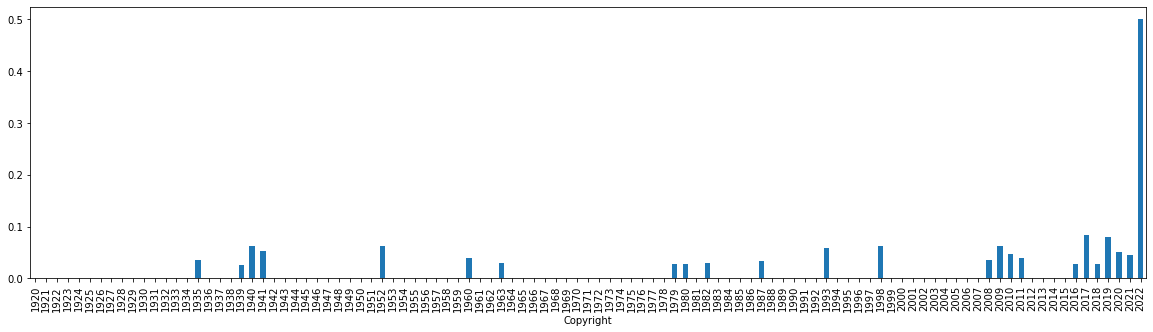

In [157]:
jak_casto("partner")

Copyright
1920    0.25
1921     NaN
1922     NaN
1923     NaN
1924     NaN
        ... 
2018     NaN
2019     NaN
2020     NaN
2021     NaN
2022     NaN
Name: Film, Length: 103, dtype: float64

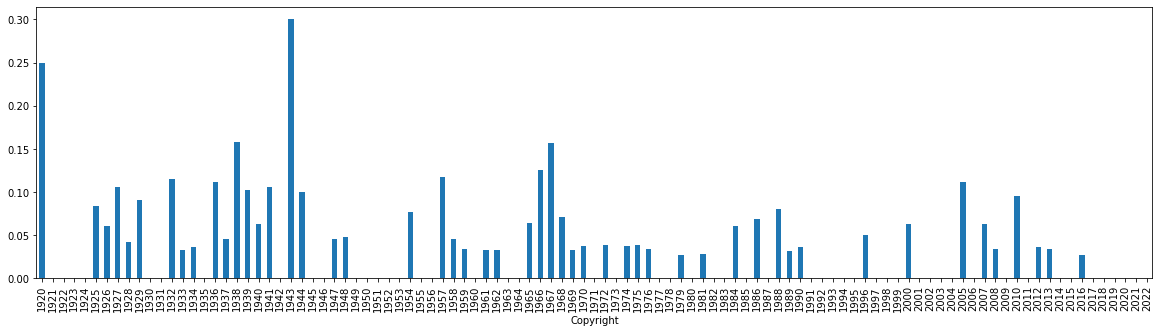

In [156]:
jak_casto("sebevražd")

Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018         NaN
2019    0.026316
2020         NaN
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

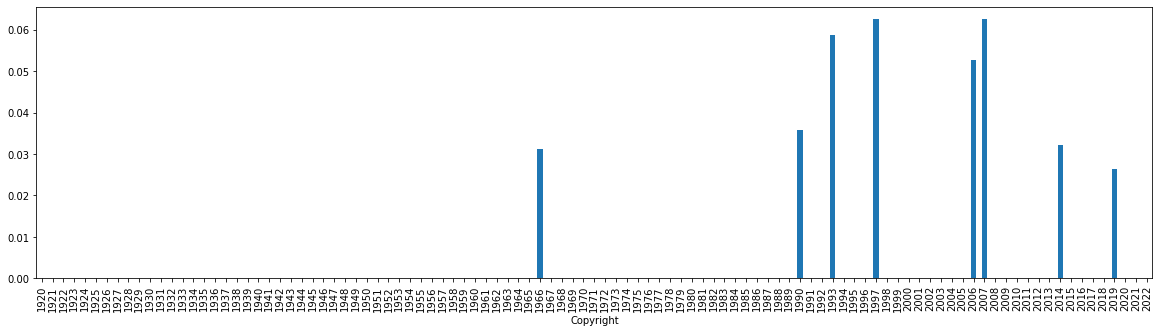

In [151]:
jak_casto(" homosex| gay| lesb")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018         NaN
2019         NaN
2020         NaN
2021    0.090909
2022         NaN
Name: Film, Length: 103, dtype: float64

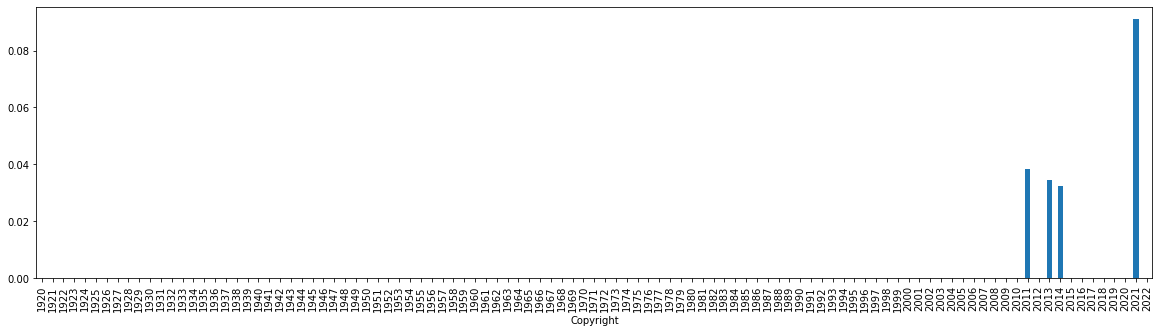

In [137]:
jak_casto("(joint|marihuan)")

In [136]:
hcf[hcf["Obsah"].str.lower().str.contains("(joint| tráv[au][^\w)]|marihuan)", na=False)].sort_values(by="Copyright")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\352645592.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  hcf[hcf["Obsah"].str.lower().str.contains("(joint| tráv[au][^\w)]|marihuan)",na=False)].sort_values(by="Copyright")


,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Délka obsahu,Obsah1k,Obsah1k délka
2269,"Babička I., II. (396899)",Československo,1971,1970—1971,předpremiéra 8. 10. 1971 (Náchod) ...,163.0,[Antonín Moskalyk (3695)],film,poetický,hraný,"Babička I., II.","Babička I., II.",Granny,None,None,"[Jarmila Kurandová (126965), Zdeněk Matouš (131469), Míla Myslíková (26893), Libuše Šafránková (...","[babička, panský úředník Jan Prošek, Tereza, Proškova žena, babiččina dcera, Barunka, dcera Proš...",[Helena Rohanová],[Stanislava Hutková],None,"[František Pavlíček (1092), Antonín Moskalyk (3695)]","[Vladimír Kovářík (108458), Alena Břízová (83533)]",[Jiří Šámal (1778)],None,[Vladimír Labský (5265)],[Fernand Vácha (86358)],[Jaroslav Čermák (125484)],[Zdeněk Stehlík (76483)],[Adolf Böhm (126000)],None,[Vladimír Vojta (21766)],"[Luděk Marold (126957), Hana Jehličková (128949)]",None,[1492],None,[],Český televizní film na motivy knihy Boženy Němcové.,"[Československá televize Praha (104176), Filmové studio Barrandov (96664)]",None,[ČESKÁ TELEVIZE (92472)],[Ústřední půjčovna filmů (106116)],dlouhometrážní,"[16mm, 35mm]",1.37,barevný,zvukový,mono,česká,česky,bez titulků,české,None,"Předjaří (Pohádka). Jan, Vilém, Adélka a Barunka, děti panského úředníka Proška, radostně vítají...",None,None,None,None,None,None,None,None,None,4637.0,None,None,Autorství scénáře Františka Pavlíčka zůstalo z politických důvodů neuvedeno. Babička je dvoudíln...,[Vojtěch Ron (34105)],None,None,"[22832, Božena Němcová (Babička – kniha)]",None,None,None,None,None,None,None,"[15006, 4995]",None,None,"[Vladimír Mácha (127847), Miloslav Dvořák (88884)]","[Josef Vítek (125772), Josef Vítek]",None,None,[Jaroslav Kupšík],None,None,None,None,"[Šly panenky silnicí, Husička divoká, Na rozloučení, mý potěšení, Nešťastný šafářův dvoreček, Si...","[Jarmila Kurandová (126965), Oldřich Vlach (14387), Libuše Geprtová (26886), Jarmila Kurandová (...",schválení literárního scénáře 20. 1. 1970 ...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,[Aleš Voleman (9511)],None,None,[Zdeněk Flídr (2188)],[Eliška Vojtová (75479)],"[Jana Ledecká (31456), Věnceslava Vrtišková (87399)]",[Jana Šimůnková (129634)],None,None,None,None,None,None,"Skupina zakázkových filmů, Jan Klement (vedoucí Skupiny zakázkových filmů

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018         NaN
2019         NaN
2020         NaN
2021    0.045455
2022         NaN
Name: Film, Length: 103, dtype: float64

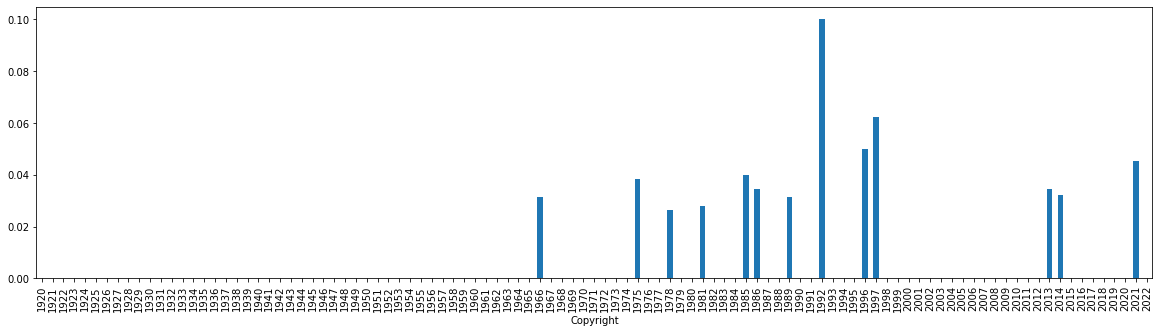

In [131]:
jak_casto("(drog[ay]|pervit|heroi|marihu| fet|narkom)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

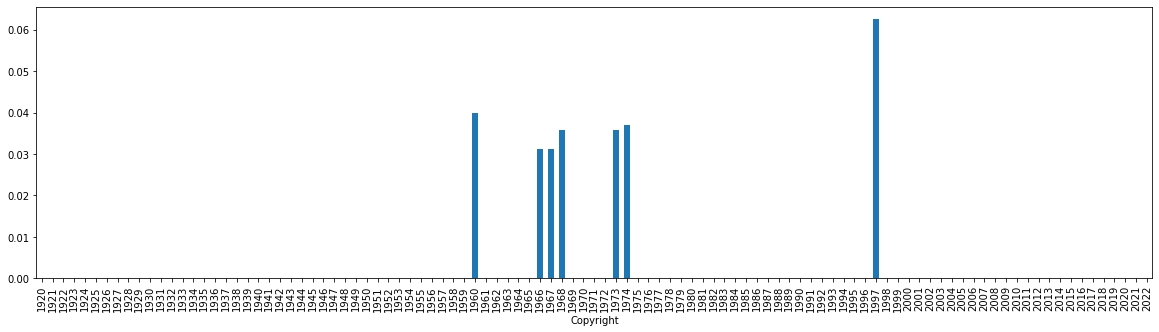

In [86]:
jak_casto("(koupališ|plavár|plovár)")

Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018    0.027027
2019    0.052632
2020    0.150000
2021    0.090909
2022         NaN
Name: Film, Length: 103, dtype: float64

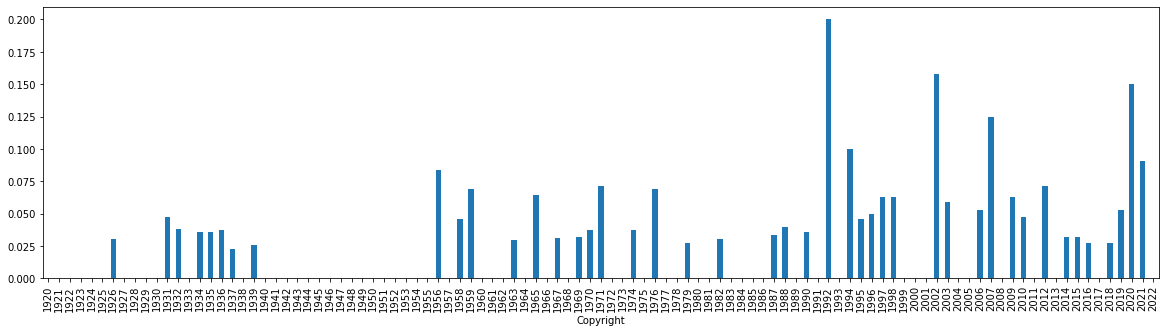

In [123]:
jak_casto("telefo")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920         NaN
1921    0.111111
1922    0.047619
1923         NaN
1924         NaN
          ...   
2018         NaN
2019    0.026316
2020    0.100000
2021    0.090909
2022         NaN
Name: Film, Length: 103, dtype: float64

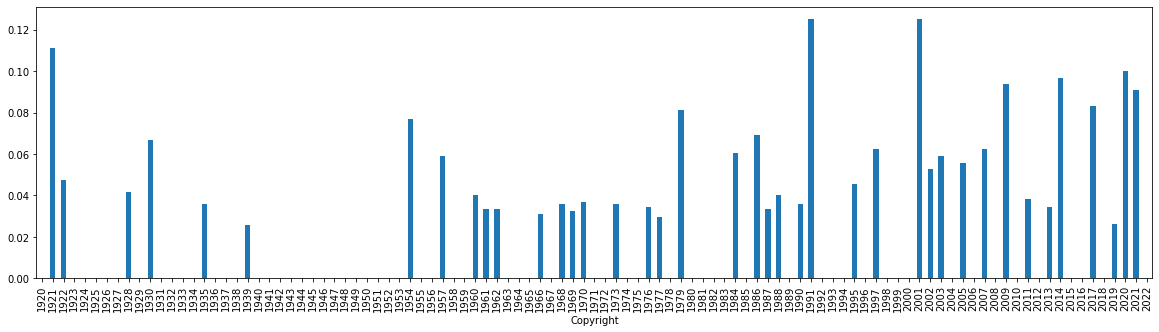

In [113]:
jak_casto("( mořsk| moře| moři | pláž | pobřež)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920    0.125000
1921         NaN
1922    0.190476
1923         NaN
1924         NaN
          ...   
2018    0.027027
2019         NaN
2020         NaN
2021    0.045455
2022         NaN
Name: Film, Length: 103, dtype: float64

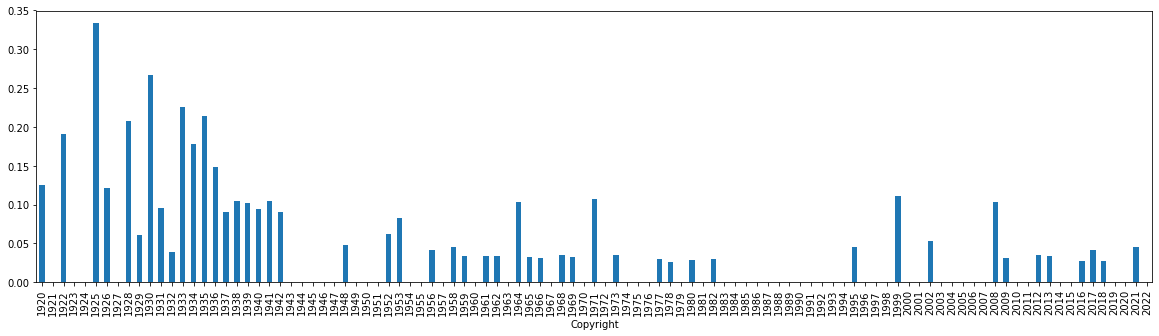

In [73]:
jak_casto("(zásnub|zasnoub| věno| věna)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

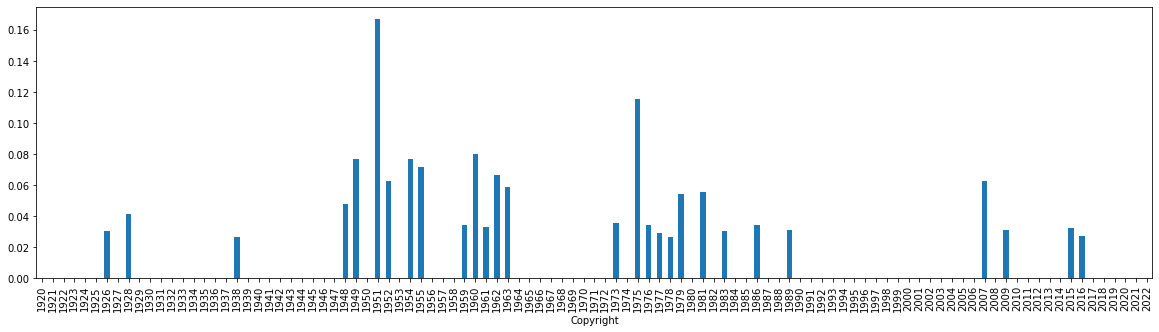

In [71]:
jak_casto("(zeměděl|traktor|kombajn)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

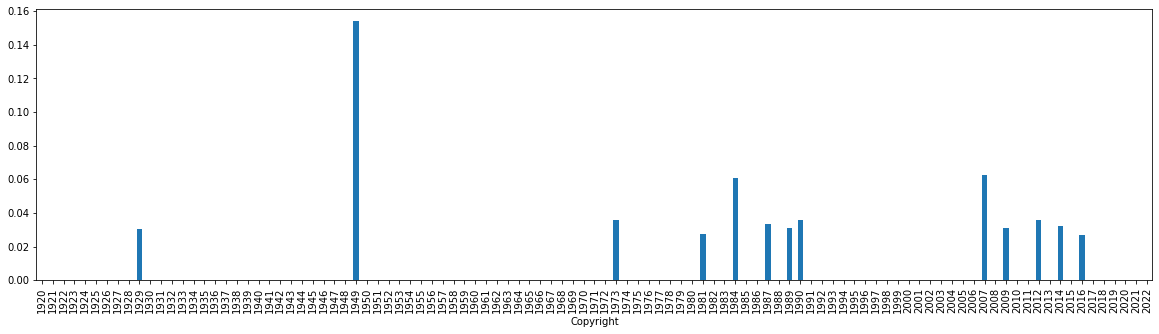

In [67]:
jak_casto("(potrat|interrupc)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

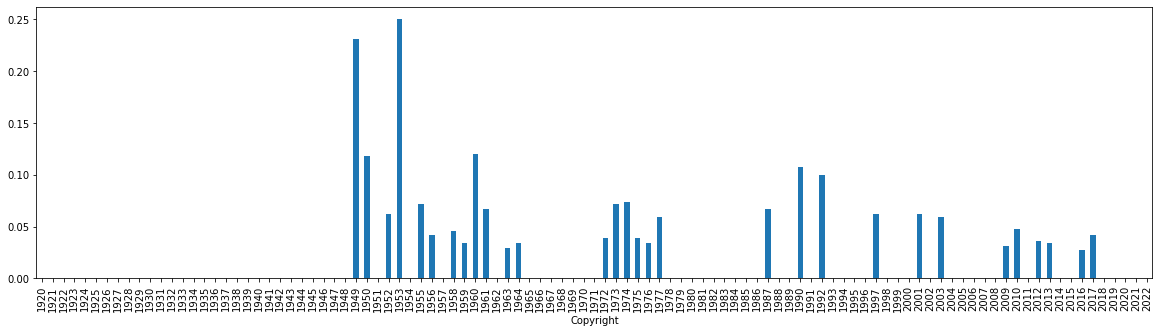

In [58]:
jak_casto("(komunis|KSČ|socialist)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920         NaN
1921         NaN
1922    0.095238
1923         NaN
1924    0.375000
          ...   
2018         NaN
2019    0.026316
2020         NaN
2021    0.045455
2022         NaN
Name: Film, Length: 103, dtype: float64

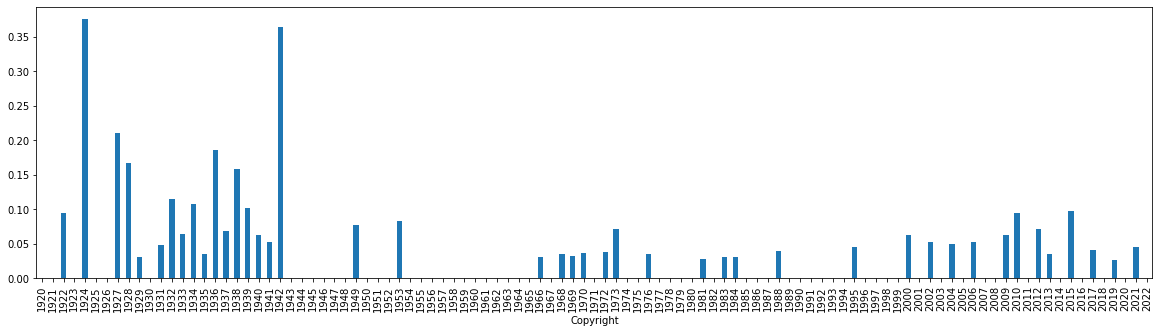

In [59]:
jak_casto("(podnika[tv]|továrník)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018         NaN
2019    0.078947
2020    0.050000
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

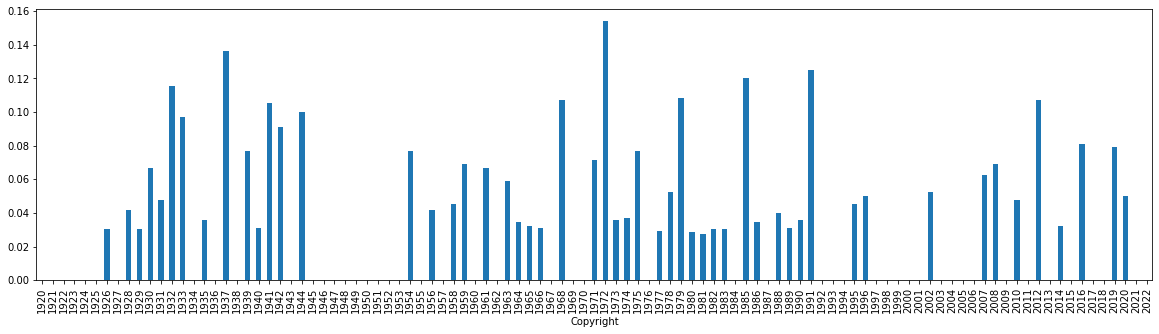

In [60]:
jak_casto("rozv(od|ed|és)")

Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

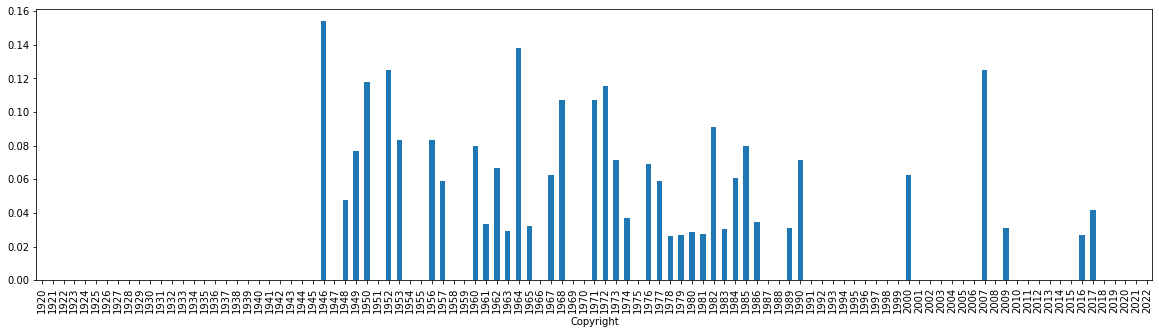

In [61]:
jak_casto("fašist|nacist|gestap")

Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018    0.027027
2019    0.026316
2020         NaN
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

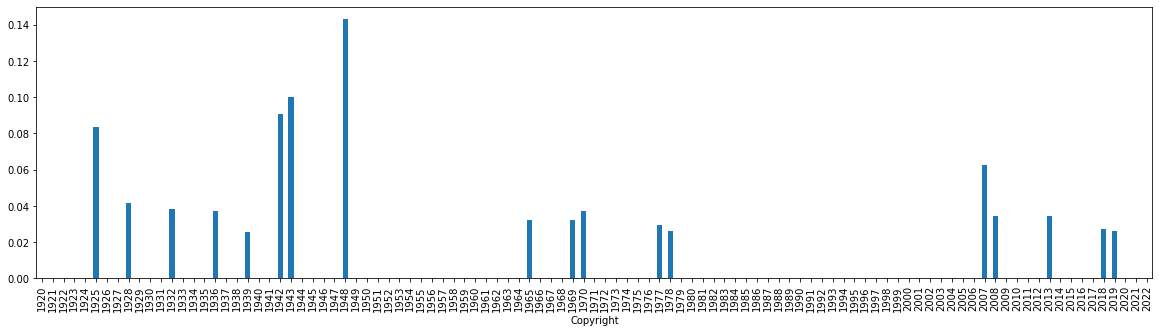

In [112]:
jak_casto(" nákup| nakup")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

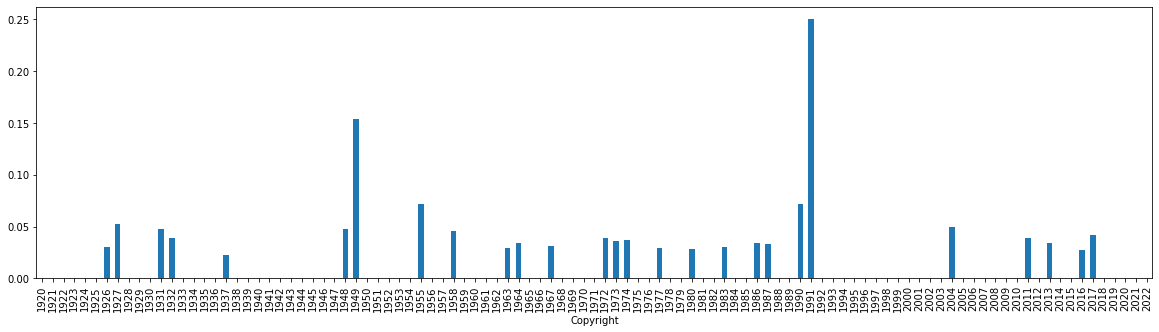

In [62]:
jak_casto("(revolu|převrat)")

Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

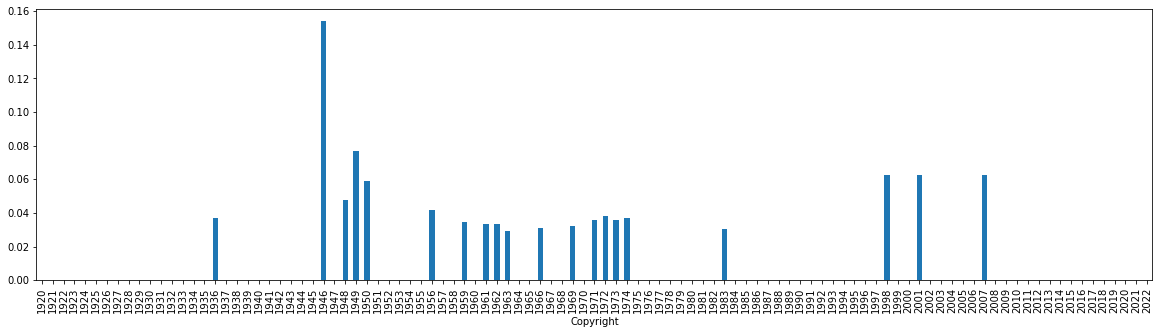

In [63]:
jak_casto("partyz")

Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018         NaN
2019         NaN
2020    0.050000
2021    0.090909
2022         NaN
Name: Film, Length: 103, dtype: float64

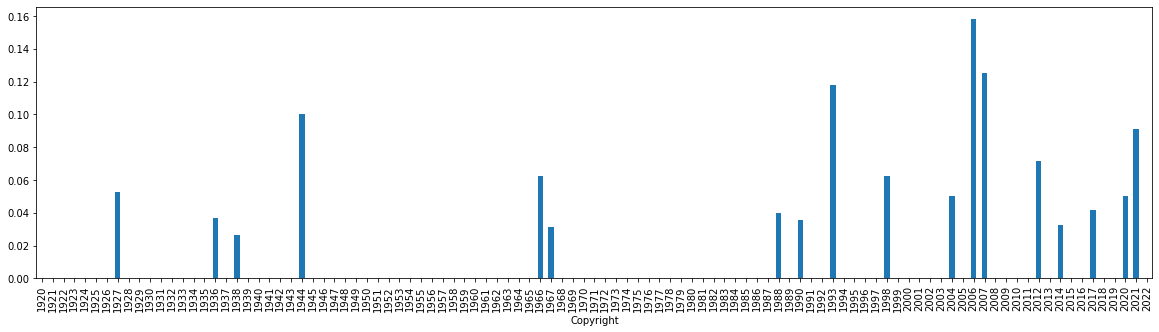

In [64]:
jak_casto("sex")

Copyright
1920    0.250000
1921    0.111111
1922    0.095238
1923    0.076923
1924         NaN
          ...   
2018         NaN
2019    0.026316
2020    0.100000
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

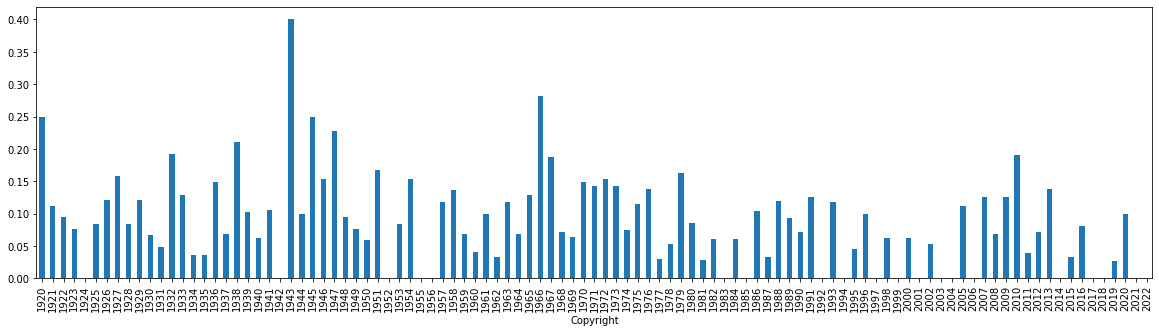

In [124]:
jak_casto("vražd| vrah")

Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924    0.125000
          ...   
2018    0.027027
2019    0.026316
2020         NaN
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

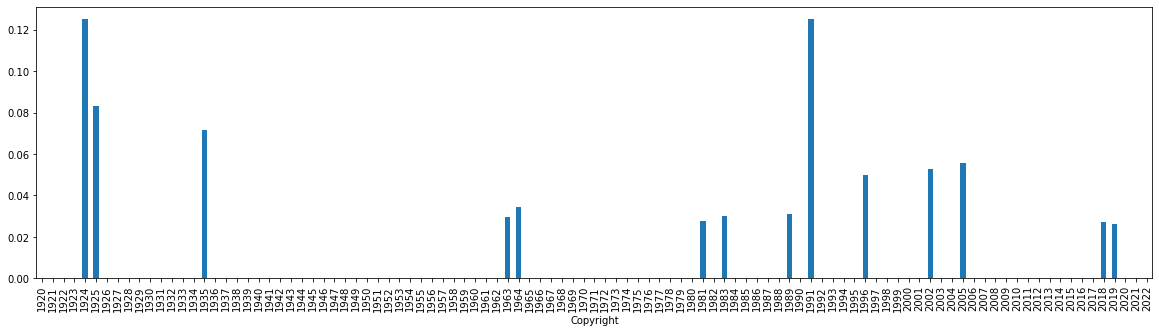

In [127]:
jak_casto("alkoholi")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018    0.027027
2019         NaN
2020         NaN
2021    0.045455
2022         NaN
Name: Film, Length: 103, dtype: float64

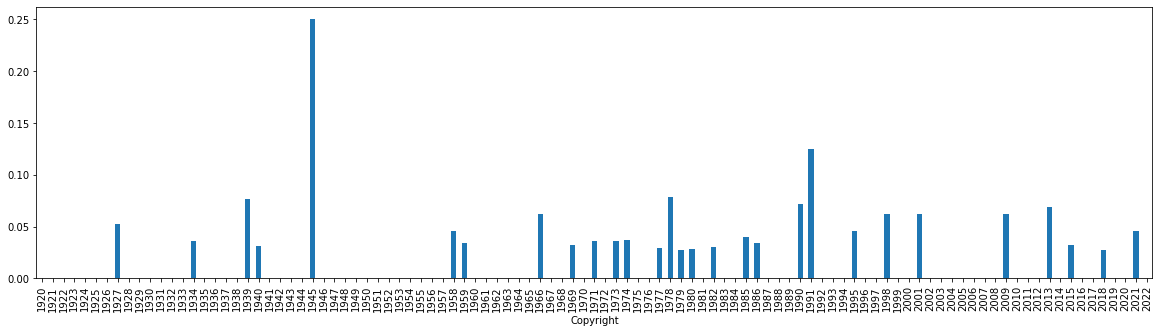

In [93]:
jak_casto("(zhrouc|zhrout|hyster)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920         NaN
1921         NaN
1922    0.095238
1923         NaN
1924         NaN
          ...   
2018    0.027027
2019    0.052632
2020         NaN
2021         NaN
2022    0.500000
Name: Film, Length: 103, dtype: float64

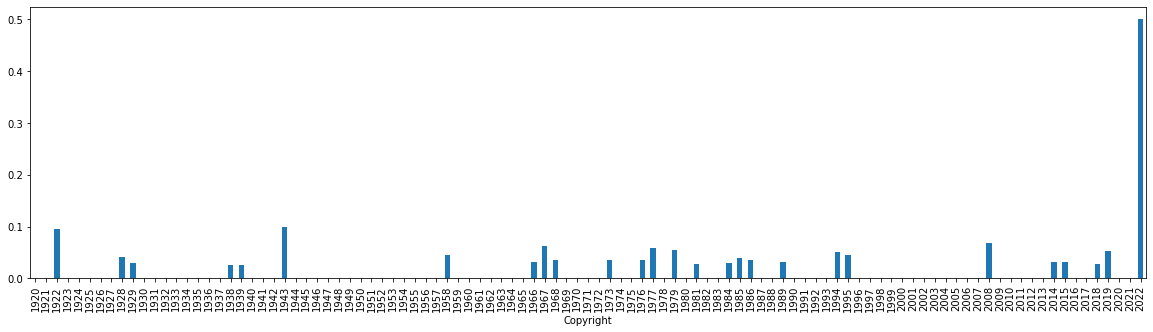

In [88]:
jak_casto("( chatu| chatě | chata)")

C:\Users\micha\AppData\Local\Temp\ipykernel_29760\1085284462.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  cetnost = df_pracovni[df_pracovni["Obsah1k"].str.lower().str.contains(slovo,regex=True,na=False)].groupby("Copyright")["Film"].nunique() / df_pracovni.groupby("Copyright")["Film"].nunique()


Copyright
1920    0.125000
1921    0.222222
1922    0.095238
1923    0.230769
1924    0.125000
          ...   
2018         NaN
2019    0.052632
2020         NaN
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

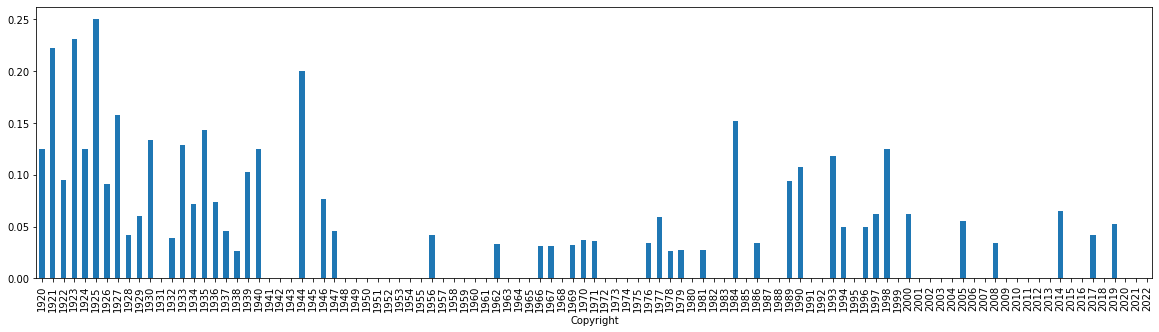

In [65]:
jak_casto("(hrabě|kníže|kněžn)")

Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018         NaN
2019    0.026316
2020         NaN
2021    0.045455
2022         NaN
Name: Film, Length: 103, dtype: float64

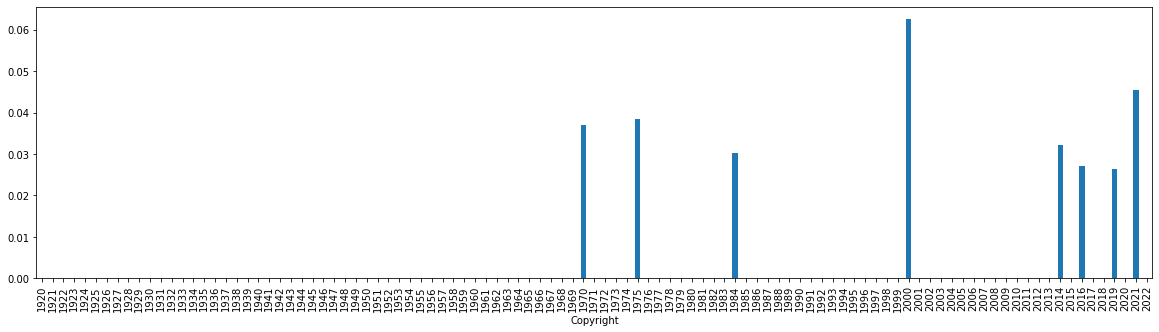

In [98]:
jak_casto(" rande")

Copyright
1920   NaN
1921   NaN
1922   NaN
1923   NaN
1924   NaN
        ..
2018   NaN
2019   NaN
2020   NaN
2021   NaN
2022   NaN
Name: Film, Length: 103, dtype: float64

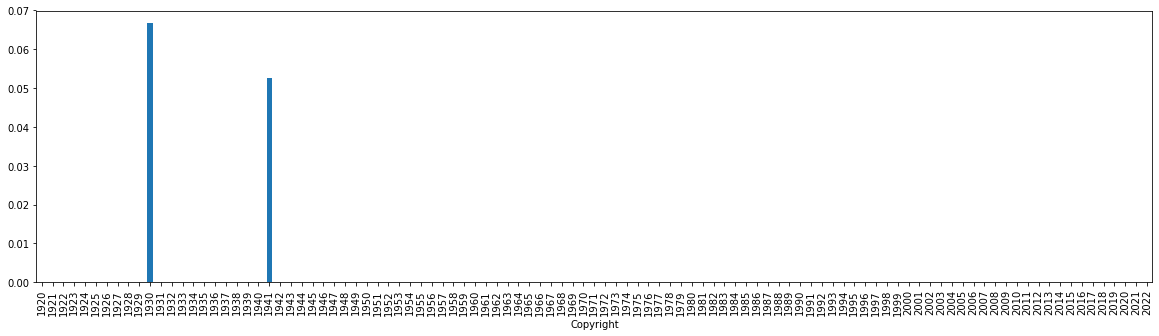

In [99]:
jak_casto(" dostaveníč")

In [104]:
hcf[hcf["Obsah"].str.lower().str.contains("kavárn",na=False)].head(20)

,Film,Země původu,Copyright,Rok výroby,Premiéra,Minutáž,Režie,Kategorie,Žánr,Typologie,Originální název,Český název,Anglický název,Souběžný název,Pracovní název,Hrají,Postavy,Pomocná režie,Asistent režie,Původní filmový námět,Scénář,Dramaturg,Kamera,Asistent kamery,Architekt,Návrhy kostýmů,Masky,Střih,Zvuk,Producent,Vedoucí výroby,Zástupce vedoucího výroby,Odborný poradce,Hudba,Choreografie,Lokace,Distribuční slogan,Výrobce,S podporou,Nositelé copyrightu,Distribuce,Délka,Distribuční nosič,Poměr stran,Barva,Zvukový,Zvukový systém/formát,Verze,Mluveno,Podtitulky,Úvodní/závěrečné titulky,Anotace,Obsah,Technický scénář,Výtvarník,Animace,Triky,Postprodukce,Návrhy titulků,Pedagogické vedení,Použitá hudba,Studentský film,Původní metráž,Mezititulky,Ocenění,Poznámka,Mluví,Vizuální efekty,Vedoucí produkce,Předloha,Kaskadéři,Text písně,Zpívá,pásmo,Části,Produkce,Výtvarná spolupráce,Nahrál,Partner,Animační technika,Výprava,Spolupráce,Komentář,Autor komentáře,Druhá kamera,Zvláštní efekty,Koproducent,Výběr hudby,Hudební dramaturgie,Písně,"Hudba, text a zpěv písně",Produkční data,Koordinátor kaskadérů,Výkonná produkce,Zástupce vedoucího produkce,Hudební režie,Účinkují,Dirigent,Ateliéry,Režie české verze,Výrobce české verze,Tančí,České podtitulky,Výrobce českých podtitulků,Asistent vedoucího produkce,Natáčecí formát,Dialogy české verze,Autor projektu,Stav filmu,Souběžný anglický název,Assistent architekta,Asistent zvuku,Podnázev,Asistent vedoucího výroby,Skript,Kostýmy,Asistent střihu,povídkový film,Povídky,Hudba k písni,Prodej práv,Podnázev anglický,Výtvarník pozadí,Výrobní skupina,Zákazník,Vývozní společnost,Umělecké vedení,Zpěv role,Překlad české verze,Rychlost,Přístupnost,cyklus,Začátek výroby,Konec výroby,Délka obsahu,Obsah1k,Obsah1k délka
481,Vše pro lásku (395517),Československo,1930,1930,"slavnostní premiéra 23. 10. 1930 (kino Stadion, Brno) ...",78.0,[Martin Frič (20324)],film,komedie,hraný,Vše pro lásku,Vše pro lásku,All for Love,None,None,"[Valentin Šindler (128596), Suzanne Marwille (127373), František Klika (128312), Marie Pavlíková...","[stréček Matěj Křópal z Břochovan, Věra, neteř stréčka Křópala, Douglas Odkolek, vdova, Douglaso...",None,None,[František Klika (128312)],None,None,[Roman Miškevyč (128315)],None,None,None,None,None,None,None,None,None,None,None,None,[],První moravský film.,[Terra (124819)],None,[Národní filmový archiv (92324)],[Terra (124819)],dlouhometrážní,35mm,1.33,černobílý,němý,None,česká,bez dialogů,bez titulků,české,None,Na hanáckém gruntu hospodaří Matěj Křópal se svou ženou. Na prázdniny k nim přijede neteř Věra. ...,None,None,None,None,None,None,None,None,None,2225.0,české,None,Filmové materiály jsou pokládány za ztracené.,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,datum cenzury 10/1930,None,None,None,None,None,None,AB Vinohrady,None,None,None,None,None,None,None,None,None,nedochovaný,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1930,1930,964,Na hanáckém gruntu hospodaří Matěj Křópal se svou ženou. Na prázdniny k nim přijede neteř Věra. ...,964
529,"Načeradec, král kibiců (395580)",Československo,1932,1932,"premiéra 12. 2. 1932 /nepřístupný mládeži/ (kina Adria /3 týdny/, Kotva /2 týdny/ a Lucerna /2 t...",101.0,[Gustav Machatý (33488)],film,komedie,hraný,"Načeradec, král kibiců","Načeradec, král kibiců","Načeradec, King of the Kibitzers",None,"Načeradec, kníže kibiců","[Hugo Haas (37289), Jožka Vanerová (129958), Hana Vítová (126418), Jaroslav Vojta (77195), Roman...","[obchodník Richard Načeradec, Hedvika, Načeradcova žena, advokátka Edith, dcera Načeradcových, o...",None,None,[Karel Poláček (5798)],"[Karel Poláček (5798), Gustav Machatý (33488)]",None,[Václav Vích (127291)],None,[Hanuš Gödert (127307)],None,None,[Antonín Zelenka (4758)],"[Helmuth Neumann (128396), Josef Zora (127308)]",None,None,None,None,[43206],None,[],None,[AB (114216)],None,[Náro

Copyright
1920         NaN
1921         NaN
1922         NaN
1923         NaN
1924         NaN
          ...   
2018    0.027027
2019    0.052632
2020    0.050000
2021         NaN
2022         NaN
Name: Film, Length: 103, dtype: float64

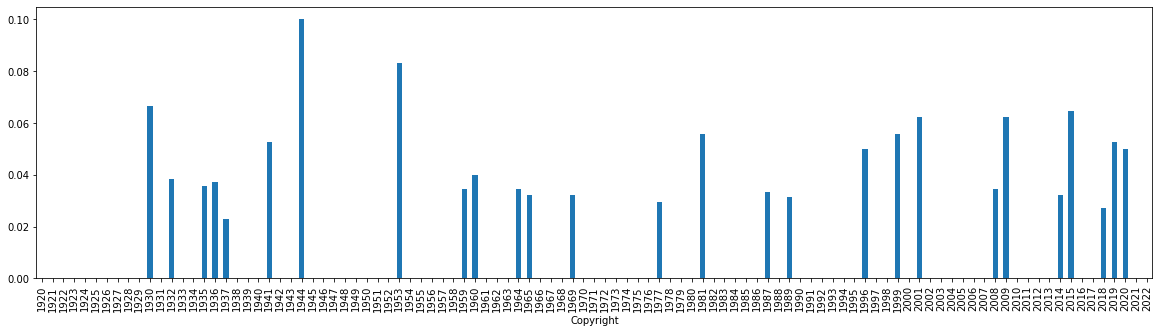

In [101]:
jak_casto(" kavárn")

Copyright
1920    0.125000
1921    0.111111
1922    0.047619
1923         NaN
1924    0.375000
          ...   
2018         NaN
2019    0.026316
2020         NaN
2021    0.045455
2022         NaN
Name: Film, Length: 103, dtype: float64

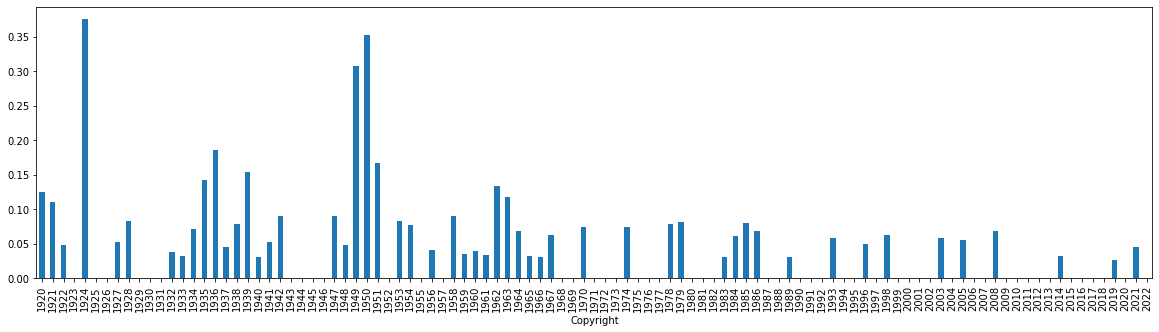

In [100]:
jak_casto(" továrn[aěyou]| pol[eí][^\w]")

## Komu patří český film?

In [66]:
df.explode("Nositelé copyrightu").groupby("Nositelé copyrightu")["Film"].nunique().nlargest(30)

Nositelé copyrightu
Národní filmový archiv (92324)                                          1946
Státní fond kinematografie (124966)                                      918
ČESKÁ TELEVIZE (92472)                                                   493
Filmová a televizní fakulta Akademie múzických umění v Praze (92300)      84
Rozhlas a televízia Slovenska (123177)                                    67
NEGATIV s.r.o. (92586)                                                    51
KRÁTKÝ FILM PRAHA a. s. [od 1991] (92610)                                 35
Universal Production Partners, a.s. (92762)                               33
i/o post s.r.o. (101238)                                                  31
Bionaut s.r.o. (100839)                                                   28
innogy Česká republika a.s. (102179)                                      27
CINEART TV Prague s.r.o. (92896)                                          25
endorfilm s.r.o. (99496)                                